# Importovanie knižnic

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler,LabelEncoder
from sklearn.metrics import confusion_matrix,classification_report,roc_auc_score,roc_curve,auc,ConfusionMatrixDisplay
from scipy.stats import chi2_contingency
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import ADASYN,SMOTE
from sklearn.naive_bayes import GaussianNB  
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest,chi2
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression


%matplotlib inline
sns.set()
pd.set_option ('display.max_columns', 50)

# Priprava datasetu

In [2]:
#Načítanie dát z csv súboru do datasetu data, následne premenovanie stĺpcov a vytvorenie nového csv súboru v ktorom budú už premenované stlpce atribútov.
data = pd.read_csv('bank-additional-full.csv')
data.columns = ['Columns']
split = data["Columns"].str.split(pat=';',expand=True)
split.to_csv('bank_4.csv')
bank = pd.read_csv('bank_4.csv')
bank.drop('Unnamed: 0',inplace=True, axis=1)
bank = bank.rename(columns = {'0':'vek',
                              '1':'povolanie',    
                              '2':'r_stav',
                              '3':'vzdelanie',
                              '4':'podlžnosti',
                              '5' : 'uver_byvanie', 
                              '6' : 'osobny_uver',
                              '7' : 'typ_kontaktu', 
                              '8' : 'mesiac',
                              '9' : 'den', 
                              '10' : 'dlžka_kontaktu',
                              '11' : 'počet_kontaktov', 
                              '12' : 'dni_posledny_kontakt',
                              '13' : 'predchadzajuce_kontakty', 
                              '14' : 'vysledok_pred_kampan', 
                              '15' : 'zmena_zamestnanosti', 
                              '16' : 'idx_cien_spotrebitelov',
                              '17' : 'idx_spotrebitel_dovery', 
                              '18' : 'euriborn3m', 
                              '19' : 'počet_zamestnancov', 
                              '20' : 'y'})


#Vyvorenie dvoch nových súborov, ktoré v akutalnom stave budú obsahovať rovnaké dáta. Tieto datasety budú slúžiť na vytvorenie dvoch rozdielnych datasetov a to jeden, ktorý bude mať podstránené určité dáta a druhý, ktorý tie dáta mať odstránené nebude.
bank.to_csv('final.csv')
bank.to_csv('final2.csv')
bank2 = pd.read_csv('final2.csv')
bank2.drop('Unnamed: 0',inplace=True, axis=1)
# pomocou funkcii .drop sme v datasete bank a bank2 odstránili stĺpec Unnamed: 9 ktorý nám vznikol po načpitaní datasetu.

In [3]:
#pomocou tohot príkazu sme si zobrazili časť dát potrebnú pre kontrolu či sú dáta správne rozdelené
bank.head()

,vek,povolanie,r_stav,vzdelanie,podlžnosti,uver_byvanie,osobny_uver,typ_kontaktu,mesiac,den,dlžka_kontaktu,počet_kontaktov,dni_posledny_kontakt,predchadzajuce_kontakty,vysledok_pred_kampan,zmena_zamestnanosti,idx_cien_spotrebitelov,idx_spotrebitel_dovery,euriborn3m,počet_zamestnancov,y
0,56,"""housemaid""","""married""","""basic.4y""","""no""","""no""","""no""","""telephone""","""may""","""mon""",261,1,999,0,"""nonexistent""",1.1,93.994,-36.4,4.857,5191.0,"""no"""
1,57,"""services""","""married""","""high.school""","""unknown""","""no""","""no""","""telephone""","""may""","""mon""",149,1,999,0,"""nonexistent""",1.1,93.994,-36.4,4.857,5191.0,"""no"""
2,37,"""services""","""married""","""high.school""","""no""","""yes""","""no""","""telephone""","""may""","""mon""",226,1,999,0,"""nonexistent""",1.1,93.994,-36.4,4.857,5191.0,"""no"""
3,40,"""admin.""","""married""","""basic.6y""","""no""","""no""","""no""","""telephone""","""may""","""mon""",151,1,999,0,"""nonexistent""",1.1,93.994,-36.4,4.857,5191.0,"""no"""
4,56,"""services""","""married""","""high.school""","""no""","""no""","""yes""","""telephone""","""may""","""mon""",307,1,999,0,"""nonexistent""",1.1,93.994,-36.4,4.857,5191.0,"""no"""


# Zistovanie početnosti neznamych v datasete
V tejto časti sme si pomocou print funkcie skontrolovali aké hodnoty nadobúdajú a zistili že atribút podlžnosti obsahuje veľke množstvo unknown hodnot, tento atribut neskor odstránime


In [4]:
print(bank['povolanie'].value_counts())

povolanie
"admin."           10422
"blue-collar"       9254
"technician"        6743
"services"          3969
"management"        2924
"retired"           1720
"entrepreneur"      1456
"self-employed"     1421
"housemaid"         1060
"unemployed"        1014
"student"            875
"unknown"            330
Name: count, dtype: int64


In [5]:
print(bank['r_stav'].value_counts())


r_stav
"married"     24928
"single"      11568
"divorced"     4612
"unknown"        80
Name: count, dtype: int64


In [6]:
print(bank['vzdelanie'].value_counts())


vzdelanie
"university.degree"      12168
"high.school"             9515
"basic.9y"                6045
"professional.course"     5243
"basic.4y"                4176
"basic.6y"                2292
"unknown"                 1731
"illiterate"                18
Name: count, dtype: int64


In [7]:
print(bank['podlžnosti'].value_counts())


podlžnosti
"no"         32588
"unknown"     8597
"yes"            3
Name: count, dtype: int64


In [8]:
print(bank['uver_byvanie'].value_counts())


uver_byvanie
"yes"        21576
"no"         18622
"unknown"      990
Name: count, dtype: int64


In [9]:
print(bank['osobny_uver'].value_counts())


osobny_uver
"no"         33950
"yes"         6248
"unknown"      990
Name: count, dtype: int64


In [10]:
print(bank['typ_kontaktu'].value_counts())


typ_kontaktu
"cellular"     26144
"telephone"    15044
Name: count, dtype: int64


In [11]:
print(bank['dni_posledny_kontakt'].value_counts())


dni_posledny_kontakt
999    39673
3        439
6        412
4        118
9         64
2         61
7         60
12        58
10        52
5         46
13        36
11        28
1         26
15        24
14        20
8         18
0         15
16        11
17         8
18         7
22         3
19         3
21         2
25         1
26         1
27         1
20         1
Name: count, dtype: int64


In [12]:
print(bank['y'].value_counts())


y
"no"     36548
"yes"     4640
Name: count, dtype: int64


# Ploty atributov

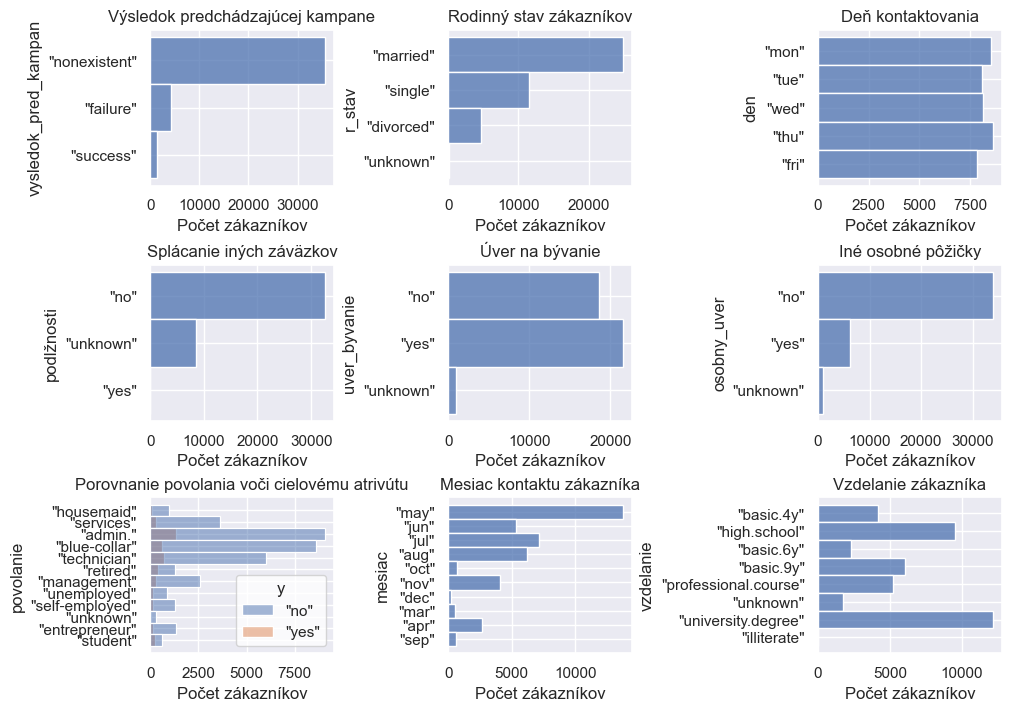

In [13]:
#v tomto bloku sme si pomocou subplotu zobrazili grafy početnosti jednotlivých kategoriálnych atribútov v histogramoch.
fig, axs = plt.subplots(3, 3, constrained_layout=True, figsize=(10, 7))

sns.set_style("whitegrid")
sns.histplot(data=bank, y="vysledok_pred_kampan", ax=axs[0, 0])
axs[0, 0].set_title("Výsledok predchádzajúcej kampane")
axs[0,0].set_xlabel("Počet zákazníkov")

sns.histplot(data=bank, y="r_stav", ax=axs[0, 1])
axs[0, 1].set_title("Rodinný stav zákazníkov")
axs[0,1].set_xlabel("Počet zákazníkov")

sns.histplot(data=bank, y="den", ax=axs[0, 2])
axs[0, 2].set_title("Deň kontaktovania")
axs[0,2].set_xlabel("Počet zákazníkov")

sns.histplot(data=bank, y="podlžnosti", ax=axs[1, 0])
axs[1, 0].set_title("Splácanie iných záväzkov")
axs[1,0].set_xlabel("Počet zákazníkov")

sns.histplot(data=bank, y="uver_byvanie", ax=axs[1, 1])
axs[1, 1].set_title("Úver na bývanie")
axs[1,1].set_xlabel("Počet zákazníkov")

sns.histplot(data=bank, y="osobny_uver", ax=axs[1, 2])
axs[1, 2].set_title("Iné osobné pôžičky")
axs[1,2].set_xlabel("Počet zákazníkov")

sns.histplot(bank,y="povolanie",hue="y", ax=axs[2,0])
axs[2,0].set_title("Porovnanie povolania voči cielovému atrivútu")
axs[2,0].set_xlabel("Počet zákazníkov")

sns.histplot(bank,y="mesiac",ax=axs[2,1])
axs[2, 1].set_title("Mesiac kontaktu zákazníka")
axs[2,1].set_xlabel("Počet zákazníkov")

sns.histplot(bank,y="vzdelanie",ax=axs[2,2])
axs[2, 2].set_title("Vzdelanie zákazníka")
axs[2,2].set_xlabel("Počet zákazníkov")

plt.show()

# Korelacna tabulka

In [14]:
#v tomto bloku sme pomocou funkcie corr_table vytvorili korelačnú maticu pre numerické atribúty a následne ju pomocou heat map zobrazili graficky.
numerical_atributes = ['vek','dlžka_kontaktu','počet_kontaktov','dni_posledny_kontakt','predchadzajuce_kontakty','zmena_zamestnanosti','idx_cien_spotrebitelov','idx_spotrebitel_dovery','euriborn3m', 'počet_zamestnancov']
corr_table = bank[numerical_atributes].corr()
corr_table

,vek,dlžka_kontaktu,počet_kontaktov,dni_posledny_kontakt,predchadzajuce_kontakty,zmena_zamestnanosti,idx_cien_spotrebitelov,idx_spotrebitel_dovery,euriborn3m,počet_zamestnancov
vek,1.000000,-0.000866,0.004594,-0.034369,0.024365,-0.000371,0.000857,0.129372,0.010767,-0.017725
dlžka_kontaktu,-0.000866,1.000000,-0.071699,-0.047577,0.020640,-0.027968,0.005312,-0.008173,-0.032897,-0.044703
počet_kontaktov,0.004594,-0.071699,1.000000,0.052584,-0.079141,0.150754,0.127836,-0.013733,0.135133,0.144095
dni_posledny_kontakt,-0.034369,-0.047577,0.052584,1.000000,-0.587514,0.271004,0.078889,-0.091342,0.296899,0.372605
predchadzajuce_kontakty,0.024365,0.020640,-0.079141,-0.587514,1.000000,-0.420489,-0.203130,-0.050936,-0.454494,-0.501333
zmena_zamestnanosti,-0.000371,-0.027968,0.150754,0.271004,-0.420489,1.000000,0.775334,0.196041,0.972245,0.906970
idx_cien_spotrebitelov,0.000857,0.005312,0.127836,0.078889,-0.203130,0.775334,1.000000,0.058986,0.688230,0.522034
idx_spotrebitel_dovery,0.129372,-0.008173,-0.013733,-0.091342,-0.050936,0.196041,0.058986,1.000000,0.277686,0.100513
euriborn3m,0.010767,-0.032897,0.135133,0.296899,-0.454494,0.972245,0.688230,0.277686,1.000000,0.945154
počet_zamestnancov,-0.017725,-0.044703,0.144095,0.372605,-0.501333,0.906970,0.522034,0.100513,0.945154,1.000000


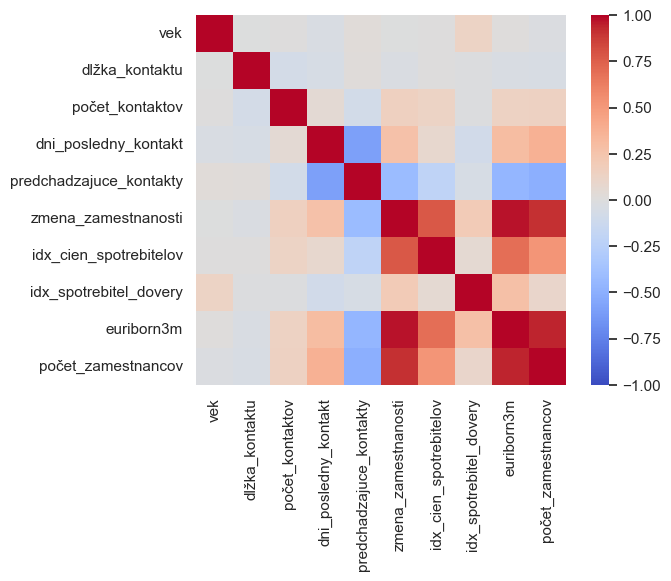

In [15]:
p = sns.heatmap(corr_table, 
                xticklabels=corr_table.columns, yticklabels=corr_table.columns,
                vmin=-1,vmax=1,
                cmap='coolwarm',
                square=True)

# chi-test

In [16]:
# v následovnom bloku sme vykonali porovnanie kategoriálnych atribútov s cieĺovým atribútom pomocou chi-kvadrát testu a výsledky sme si vypísali.
contingency_table = pd.crosstab(bank['povolanie'], bank['y'])
chi2_stat, p_val, _, _ = chi2_contingency(contingency_table)
print("-------------------povolanie-------------------")
print("Chi-squared statistic:", chi2_stat)
print("P-value:", p_val)

contingency_table = pd.crosstab(bank['r_stav'], bank['y'])
chi2_stat, p_val, _, _ = chi2_contingency(contingency_table)
print("-------------------r_stav-------------------")
print("Chi-squared statistic:", chi2_stat)
print("P-value:", p_val)

contingency_table = pd.crosstab(bank['vzdelanie'], bank['y'])
chi2_stat, p_val, _, _ = chi2_contingency(contingency_table)
print("-------------------vzdelanie-------------------")
print("Chi-squared statistic:", chi2_stat)
print("P-value:", p_val)

contingency_table = pd.crosstab(bank['podlžnosti'], bank['y'])
chi2_stat, p_val, _, _ = chi2_contingency(contingency_table)
print("-------------------podlžnosti-------------------")
print("Chi-squared statistic:", chi2_stat)
print("P-value:", p_val)

contingency_table = pd.crosstab(bank['uver_byvanie'], bank['y'])
chi2_stat, p_val, _, _ = chi2_contingency(contingency_table)
print("-------------------uver_byvanie-------------------")
print("Chi-squared statistic:", chi2_stat)
print("P-value:", p_val)

contingency_table = pd.crosstab(bank['osobny_uver'], bank['y'])
chi2_stat, p_val, _, _ = chi2_contingency(contingency_table)
print("-------------------osobny_uver-------------------")
print("Chi-squared statistic:", chi2_stat)
print("P-value:", p_val)

contingency_table = pd.crosstab(bank['typ_kontaktu'], bank['y'])
chi2_stat, p_val, _, _ = chi2_contingency(contingency_table)
print("-------------------typ_kontaktu-------------------")
print("Chi-squared statistic:", chi2_stat)
print("P-value:", p_val)

contingency_table = pd.crosstab(bank['mesiac'], bank['y'])
chi2_stat, p_val, _, _ = chi2_contingency(contingency_table)
print("-------------------mesiac-------------------")
print("Chi-squared statistic:", chi2_stat)
print("P-value:", p_val)

contingency_table = pd.crosstab(bank['den'], bank['y'])
chi2_stat, p_val, _, _ = chi2_contingency(contingency_table)
print("-------------------den-------------------")
print("Chi-squared statistic:", chi2_stat)
print("P-value:", p_val)

contingency_table = pd.crosstab(bank['vysledok_pred_kampan'], bank['y'])
chi2_stat, p_val, _, _ = chi2_contingency(contingency_table)
print("-------------------vysledok_pred_kampan-------------------")
print("Chi-squared statistic:", chi2_stat)
print("P-value:", p_val)


-------------------povolanie-------------------
Chi-squared statistic: 961.2424403289555
P-value: 4.189763287563623e-199
-------------------r_stav-------------------
Chi-squared statistic: 122.65515182252989
P-value: 2.068014648442211e-26
-------------------vzdelanie-------------------
Chi-squared statistic: 193.10590454149565
P-value: 3.3051890144025054e-38
-------------------podlžnosti-------------------
Chi-squared statistic: 406.5775146420093
P-value: 5.161957951391637e-89
-------------------uver_byvanie-------------------
Chi-squared statistic: 5.684495858974168
P-value: 0.05829447669453452
-------------------osobny_uver-------------------
Chi-squared statistic: 1.094027551150338
P-value: 0.5786752870441754
-------------------typ_kontaktu-------------------
Chi-squared statistic: 862.3183642075705
P-value: 1.525985652312996e-189
-------------------mesiac-------------------
Chi-squared statistic: 3101.149351411678
P-value: 0.0
-------------------den-------------------
Chi-squared s

# Odstránenie atributov

In [17]:
#v tomto bloku sme si definovali si najprv definovali atribúty ktoré chcem odstrániť z prislušnych datasetov tieto atributy su v premennych atributes_to_drop a atribute_to_drop
atributes_to_drop = ['osobny_uver','mesiac','vysledok_pred_kampan','podlžnosti']
atribute_to_drop = ['podlžnosti']
bank = bank.drop(atribute_to_drop,axis='columns')
bank2 = bank2.drop(atributes_to_drop,axis='columns')

#následne sme v datasete hodnoty ktoré boli unknown nahradili hodnotami NA a odstránili pomocou funkcie dropna následne sme vykonali kontrolu či daný dataset ešte obsahuje unknown hodnoty tento postup sme opakovali pre oba datasety
column_names = bank.columns
column_names2 = bank2.columns
print(column_names)
bank[column_names] = bank[column_names].replace('"unknown"',pd.NA)
bank = bank.dropna()
print(bank[column_names].isna().count())
bank[column_names] = bank[column_names].replace('"', '')

print(column_names2)
bank2[column_names2] = bank2[column_names2].replace('"unknown"',pd.NA)
bank2 = bank2.dropna()
print(bank2[column_names2].isna().count())
bank2[column_names2] = bank2[column_names2].replace('"', '')
print(bank2['y'])

Index(['vek', 'povolanie', 'r_stav', 'vzdelanie', 'uver_byvanie',
       'osobny_uver', 'typ_kontaktu', 'mesiac', 'den', 'dlžka_kontaktu',
       'počet_kontaktov', 'dni_posledny_kontakt', 'predchadzajuce_kontakty',
       'vysledok_pred_kampan', 'zmena_zamestnanosti', 'idx_cien_spotrebitelov',
       'idx_spotrebitel_dovery', 'euriborn3m', 'počet_zamestnancov', 'y'],
      dtype='object')
vek                        38245
povolanie                  38245
r_stav                     38245
vzdelanie                  38245
uver_byvanie               38245
osobny_uver                38245
typ_kontaktu               38245
mesiac                     38245
den                        38245
dlžka_kontaktu             38245
počet_kontaktov            38245
dni_posledny_kontakt       38245
predchadzajuce_kontakty    38245
vysledok_pred_kampan       38245
zmena_zamestnanosti        38245
idx_cien_spotrebitelov     38245
idx_spotrebitel_dovery     38245
euriborn3m                 38245
počet_zamestn

# transformovanie kategorialnzch atributov

In [18]:
#pre transformáciu kategoriálnych atribútov na numerické sme používali funkciu LabelEncoder. Najprv sme si vytvorili samotný ekóder v premennej ecn a následne sme ho implementovali na naše atribúty v oboch datasetoch
ecn = LabelEncoder()

bank['povolanie'] = ecn.fit_transform(bank['povolanie'])
bank['r_stav'] = ecn.fit_transform(bank['r_stav'])
bank['vzdelanie'] = ecn.fit_transform(bank['vzdelanie'])
bank['typ_kontaktu'] = ecn.fit_transform(bank['typ_kontaktu'])
bank['mesiac'] = ecn.fit_transform(bank['mesiac'])
bank['vysledok_pred_kampan'] = ecn.fit_transform(bank['vysledok_pred_kampan'])
bank['y'] = ecn.fit_transform(bank['y'])
bank['uver_byvanie'] = ecn.fit_transform(bank['uver_byvanie'])
bank['osobny_uver'] = ecn.fit_transform(bank['osobny_uver'])
bank['den'] = ecn.fit_transform(bank['den'])

bank2['povolanie'] = ecn.fit_transform(bank2['povolanie'])
bank2['r_stav'] = ecn.fit_transform(bank2['r_stav'])
bank2['vzdelanie'] = ecn.fit_transform(bank2['vzdelanie'])
bank2['typ_kontaktu'] = ecn.fit_transform(bank2['typ_kontaktu'])
bank2['y'] = ecn.fit_transform(bank2['y'])
bank2['uver_byvanie'] = ecn.fit_transform(bank2['uver_byvanie'])
bank2['den'] = ecn.fit_transform(bank2['den'])

# Normalizácia atributov

In [19]:
attributes_to_normalize = ['vek', 'dlžka_kontaktu', 'počet_kontaktov', 'dni_posledny_kontakt', 'predchadzajuce_kontakty', 
                           'zmena_zamestnanosti', 'idx_cien_spotrebitelov', 'idx_spotrebitel_dovery', 'euriborn3m', 'počet_zamestnancov']

# v tomto bloku sme pomocou minmaxscaler funkcie normalizovlai dáta, ktoré sme si na základe toho že dané atribúty boli v rozdielnych jednotkách a a veľkých rozsahoch
scaler = MinMaxScaler()
bank[attributes_to_normalize] = scaler.fit_transform(bank[attributes_to_normalize])
bank2[attributes_to_normalize] = scaler.fit_transform(bank2[attributes_to_normalize])

# Vytvorenie Train test množiny

In [20]:
# v tomto bloku sme pomocou funkcie train_test_split vytvorili z našich dvoch datasetov trenovacie a testovacie množiny pre jednotlivé datasety.
x = bank2.drop("y",axis=1)
y = bank2["y"]
train_data1,test_data1,train_label1,test_label1 = train_test_split(x,y,test_size=0.3,stratify=y,random_state=1)

x2 = bank.drop("y",axis=1)
y2 = bank["y"]
train_data2,test_data2,train_label2,test_label2 = train_test_split(x,y,test_size=0.3,stratify=y,random_state=1)

# ADASYN oversampling

In [21]:
#v tomto bloku sme vytvárali pre oba naše datasety množiny ktoré boli doplnené o dovzorkované dáta a v tomto prípade a bloku bola použitá samplovacia metóda ADASYN.
#v tejto monžine sme samplovali minoritnú triedu nášho cieľového atribútu s počtom susedov 11, parameter random state sme použili pre stálosť jednotlivých dát. Dané množiny boli v pomere 70-30 v oboch prípadoch
# do premenných x_train_adasyn sme uložili dosamlpované trénovacie dáta, do x_test_adasyn sme uložili dosamplované testovacie dáta a v atribútoch y_train_adasyn a y_test_adasyn  sme uložili trénovacie a testovacei cieľové premenne postup pri vytvarani bol pri oboch datasetoch rovnaký rozidel je iba v názve premenných ku ktorý sme pre rýchlejšie písanie pridali 2 na koniec každého názvu premennej
adasyn = ADASYN(sampling_strategy='minority', random_state=1, n_neighbors=11) 
new_data_adasyn, new_classes_adasyn = adasyn.fit_resample(x,y)

new_bank_adasyn = pd.DataFrame(new_data_adasyn, columns=bank2.columns)
new_bank_adasyn['y'] = new_classes_adasyn

x_adasyn = new_bank_adasyn.drop("y",axis=1)
y_adasyn = new_bank_adasyn["y"]
x_train_adasyn,x_test_adasyn,y_train_adasyn,y_test_adasyn = train_test_split(x_adasyn,y_adasyn,test_size=0.3,stratify=y_adasyn,random_state=1)
print("Počet hodnôt cieľového atribútu pred vzorkovaním ADASYN:")
print(new_bank_adasyn['y'].value_counts())
print("Pôvodný počet hodnôt:")
print(bank2['y'].value_counts())

adasyn2 = ADASYN(sampling_strategy='minority', random_state=1, n_neighbors=11)
new_data_adasyn2, new_classes_adasyn2 = adasyn2.fit_resample(x2,y2)

new_bank_adasyn2 = pd.DataFrame(new_data_adasyn2, columns=bank.columns)
new_bank_adasyn2['y'] = new_classes_adasyn2

x_adasyn2 = new_bank_adasyn2.drop("y",axis=1)
y_adasyn2 = new_bank_adasyn2["y"]
x_train_adasyn2,x_test_adasyn2,y_train_adasyn2,y_test_adasyn2 = train_test_split(x_adasyn2,y_adasyn2,test_size=0.3,stratify=y_adasyn2,random_state=1)
print("Počet hodnôt cieľového atribútu pred vzorkovaním ADASYN:")
print(new_bank_adasyn2['y'].value_counts())
print("Pôvodný počet hodnôt:")
print(bank['y'].value_counts())

Class distribution after ADASYN:
y
1    34245
0    33987
Name: count, dtype: int64
Original class distribution:
y
0    33987
1     4258
Name: count, dtype: int64
Class distribution after ADASYN:
y
1    34388
0    33987
Name: count, dtype: int64
Original class distribution:
y
0    33987
1     4258
Name: count, dtype: int64


# SMOTE oversampling

In [22]:
#v tomto bloku sme vytvárali pre oba naše datasety množiny ktoré boli doplnené o dovzorkované dáta a v tomto prípade a bloku bola použitá samplovacia metóda SMOTE.
#v tejto monžine sme samplovali minoritnú triedu nášho cieľového atribútu, parameter random state sme použili pre stálosť jednotlivých dát. Dané množiny boli v pomere 70-30 v oboch prípadoch
# do premenných x_train_smote sme uložili dosamlpované trénovacie dáta, do x_test_smote sme uložili dosamplované testovacie dáta a v atribútoch y_train_smote a y_test_smote  sme uložili trénovacie a testovacei cieľové premenne postup pri vytvarani bol pri oboch datasetoch rovnaký rozidel je iba v názve premenných ku ktorý sme pre rýchlejšie písanie pridali 2 na koniec každého názvu premennej

smote = SMOTE(sampling_strategy='minority', random_state=1)
new_bank_smote = smote.fit_resample(x, y)
new_data_smote, new_classes_smote = smote.fit_resample(x, y)

new_bank_smote = pd.DataFrame(new_data_smote, columns=bank2.columns)
new_bank_smote['y'] = new_classes_smote

x_smote = new_bank_smote.drop("y", axis=1)
y_smote = new_bank_smote["y"]
x_train_smote, x_test_smote, y_train_smote, y_test_smote = train_test_split(x_smote, y_smote, test_size=0.3, stratify=y_smote, random_state=1)
print("Class distribution after SMOTE:")
print(new_bank_smote['y'].value_counts())
print("Original class distribution:")
print(bank2['y'].value_counts())




smote2 = SMOTE(sampling_strategy='minority', random_state=1)
new_bank_smote2 = smote.fit_resample(x, y)
new_data_smote2, new_classes_smote2 = smote2.fit_resample(x2, y2)

new_bank_smote2 = pd.DataFrame(new_data_smote2, columns=bank.columns)
new_bank_smote2['y'] = new_classes_smote2

x_smote2 = new_bank_smote2.drop("y", axis=1)
y_smote2 = new_bank_smote2["y"]
x_train_smote2, x_test_smote2, y_train_smote2, y_test_smote2 = train_test_split(x_smote2, y_smote2, test_size=0.3, stratify=y_smote2, random_state=1)
print("Class distribution after SMOTE:")
print(new_bank_smote2['y'].value_counts())
print("Original class distribution:")
print(bank['y'].value_counts())

Class distribution after SMOTE:
y
0    33987
1    33987
Name: count, dtype: int64
Original class distribution:
y
0    33987
1     4258
Name: count, dtype: int64
Class distribution after SMOTE:
y
0    33987
1    33987
Name: count, dtype: int64
Original class distribution:
y
0    33987
1     4258
Name: count, dtype: int64


In [23]:
x_train_smote2.isna().count()
x_train_smote2.count()
print(x_train_smote2)

            vek  povolanie  r_stav  vzdelanie  uver_byvanie  osobny_uver  \
50661  0.437699          6       1          6             1            0   
48200  0.439492          0       0          6             0            0   
20337  0.160494          9       2          5             0            1   
53266  0.153854          7       1          3             1            0   
77     0.222222          0       1          6             1            0   
...         ...        ...     ...        ...           ...          ...   
21349  0.444444          0       1          6             0            0   
38579  0.205741          1       1          2             1            0   
56260  0.181861          6       2          6             0            0   
30489  0.222222          0       2          6             0            0   
10042  0.185185          8       2          6             1            0   

       typ_kontaktu  mesiac  den  dlžka_kontaktu  počet_kontaktov  \
50661             

# Bayes

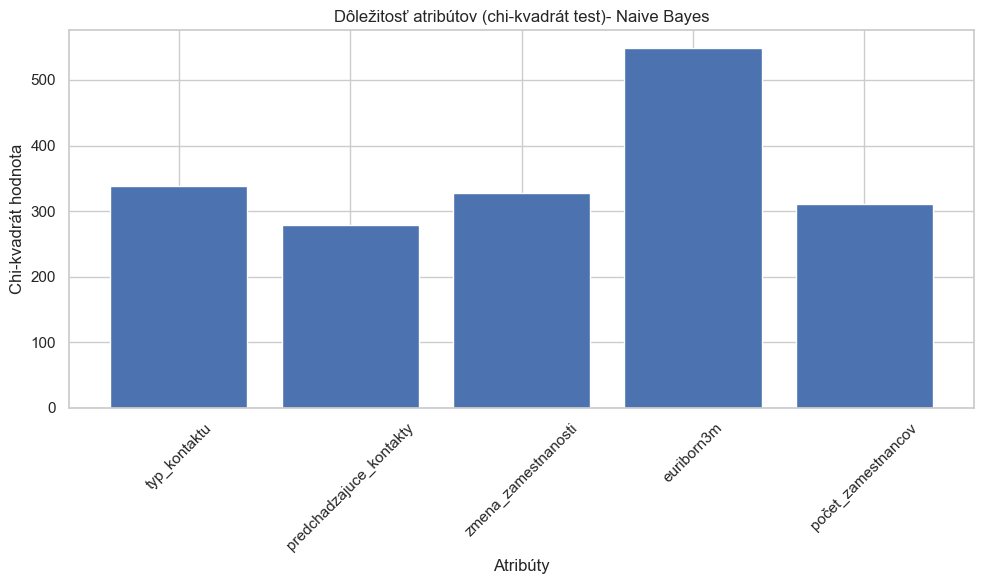

[[9018 1179]
 [ 531  746]]
              precision    recall  f1-score   support

           0     0.9444    0.8844    0.9134     10197
           1     0.3875    0.5842    0.4660      1277

    accuracy                         0.8510     11474
   macro avg     0.6660    0.7343    0.6897     11474
weighted avg     0.8824    0.8510    0.8636     11474



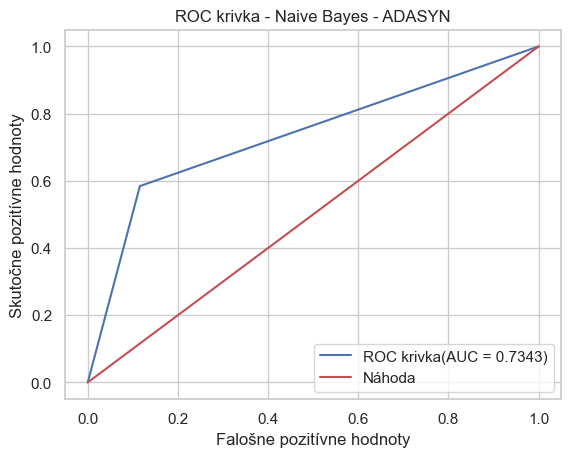

0.7342797169834141


In [24]:
#Naive Bayes bez nad vzorkovania
#Vytvorenie modelu Nive Bayes a následne trenovanie a vytvorenie novej klasifikácie.
modelBA = GaussianNB()
modelBA.fit(train_data2, train_label2)
resultB = modelBA.predict(test_data2)

#Výber najdôležitejších 5 atributov a ich zobrazenie zobrazenie.
selector = SelectKBest(chi2, k=5)  
selected_train_data = selector.fit_transform(train_data2, train_label2)
selected_indices = selector.get_support(indices=True)
selected_feature_names = [train_data2.columns[i] for i in selected_indices]
#Zobrazenie grafu s dôležitých atribútov.
plt.figure(figsize=(10, 6))
plt.bar(selected_feature_names, selector.scores_[selected_indices])
plt.xlabel("Atribúty")
plt.ylabel("Chi-kvadrát hodnota")
plt.title("Dôležitosť atribútov (chi-kvadrát test)- Naive Bayes")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#Zobrazenie matice zámen a reportu klasifikácie.
ct_bayes = confusion_matrix(test_label2, resultB)
print(ct_bayes)
print(classification_report(test_label2, resultB,digits=4))

#Vytvorenie ROC krivky a vypočítanie AUC hodnoty s následným zobrazením ROC krivky a vypísaním AUC hodnoty.
fpraa, tpraa, _ = roc_curve(test_label2, resultB)
roc_aucaa = auc(fpraa, tpraa)

#Zobrazenie grafu ROC krivky a vypísanie samostatného atribútu AUC. V grafe je AUC zobrazene na 4 desatinné miesta.
plt.plot(fpraa, tpraa, color='b', label='ROC krivka(AUC = {:.4f})'.format(roc_aucaa))
plt.plot([0, 1], [0, 1], color='r',label='Náhoda')
plt.xlabel('Falošne pozitívne hodnoty')
plt.ylabel('Skutočne pozitívne hodnoty')
plt.title('ROC krivka - Naive Bayes - ADASYN')
plt.legend(loc='lower right')
plt.show()
print('AUC:', roc_aucaa)


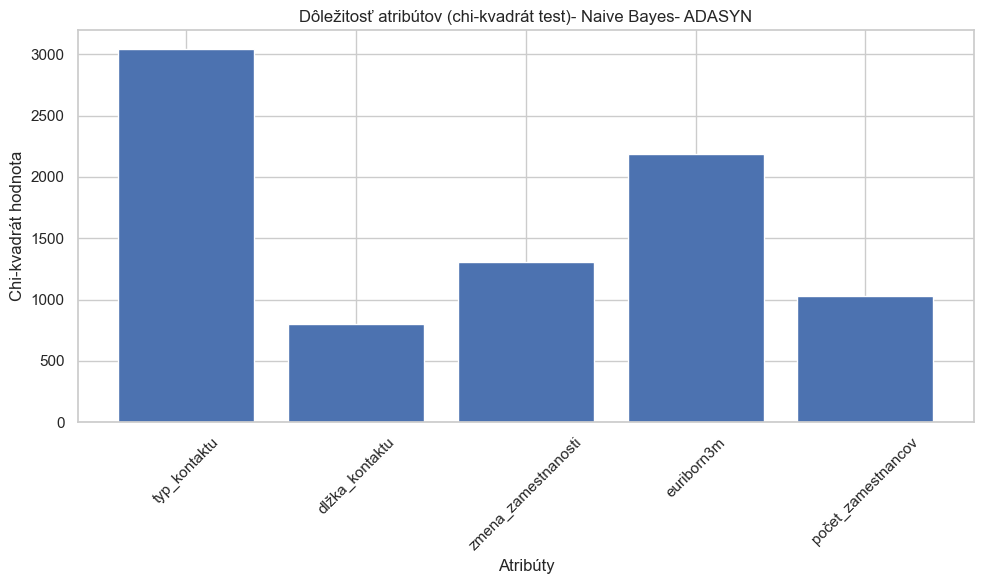

[[7610 2586]
 [2371 7903]]
              precision    recall  f1-score   support

           0     0.7624    0.7464    0.7543     10196
           1     0.7535    0.7692    0.7613     10274

    accuracy                         0.7578     20470
   macro avg     0.7580    0.7578    0.7578     20470
weighted avg     0.7579    0.7578    0.7578     20470



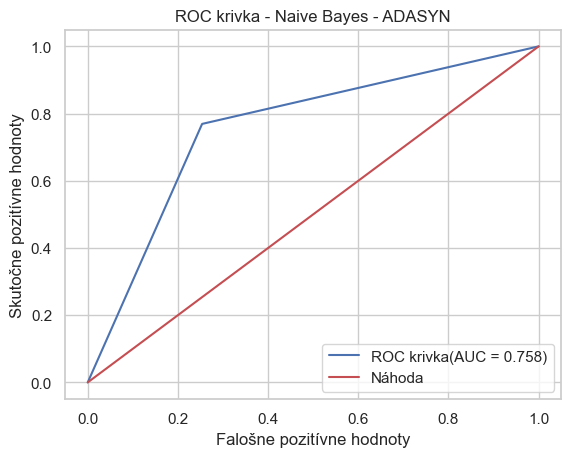

AUC0.757797204001493


In [25]:
##Bayes ADASYN                                                      
#Vytvorenie modelu Nive Bayes a následne trenovanie a vytvorenie novej klasifikácie.
modelBB = GaussianNB()
modelBB.fit(x_train_adasyn, y_train_adasyn)
resultB = modelBB.predict(x_test_adasyn)

#Výber najdoležitejších 5 atributov a ich zobrazenie.
selectorA = SelectKBest(chi2, k=5)  
selected_train_dataA = selectorA.fit_transform(x_train_adasyn, y_train_adasyn)
selected_indicesA = selectorA.get_support(indices=True)
selected_feature_namesA = [x_train_adasyn.columns[i] for i in selected_indicesA]
#Zobrazenie grafu s dôležitých atribútov.
plt.figure(figsize=(10, 6))
plt.bar(selected_feature_namesA, selectorA.scores_[selected_indicesA])
plt.xlabel("Atribúty")
plt.ylabel("Chi-kvadrát hodnota")
plt.title("Dôležitosť atribútov (chi-kvadrát test)- Naive Bayes- ADASYN")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#Zobrazenie matice zámen a reportu klasifikácie.
ct_bayes_adasyn = confusion_matrix(y_test_adasyn, resultB)
print(ct_bayes_adasyn)                        
print(classification_report(y_test_adasyn, resultB,digits=4)) 

#Vytvorenie ROC krivky a vypočítanie AUC hodnoty s následným zobrazením ROC krivky a vypísaním AUC hodnoty.
fprab, tprab, _ = roc_curve(y_test_adasyn, resultB)
roc_aucab = auc(fprab, tprab)

#Zobrazenie grafu ROC krivky a vypísanie samostatného atribútu AUC. V grafe je AUC zobrazene na 4 desatinné miesta.
plt.plot(fprab, tprab, color='b', label='ROC krivka(AUC = {:.3f})'.format(roc_aucab))
plt.plot([0, 1], [0, 1], color='r',label='Náhoda')
plt.xlabel('Falošne pozitívne hodnoty')
plt.ylabel('Skutočne pozitívne hodnoty')
plt.title('ROC krivka - Naive Bayes - ADASYN')
plt.legend(loc='lower right')
plt.show()
print('AUC:', roc_aucab)


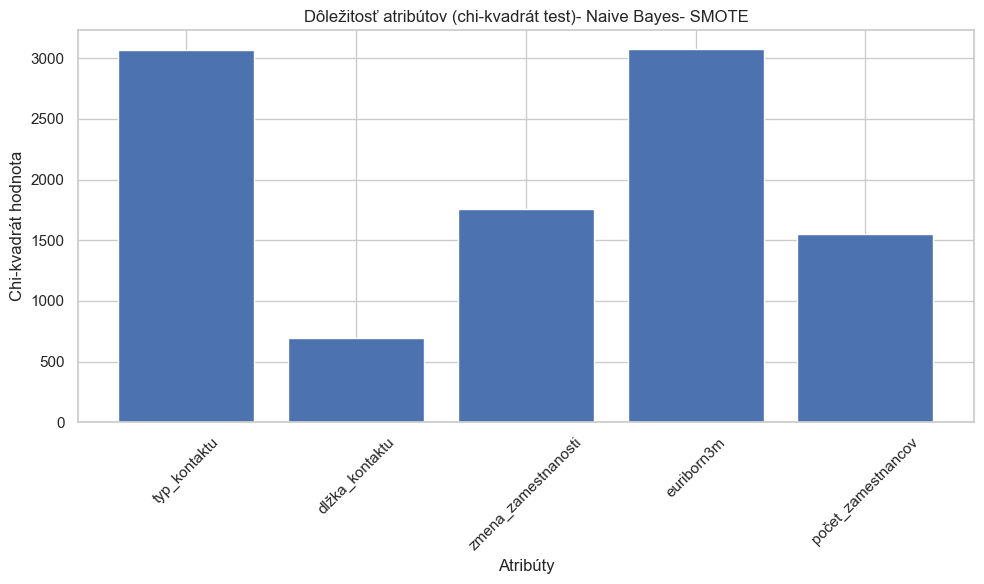

[[7730 2466]
 [2254 7943]]
              precision    recall  f1-score   support

           0     0.7742    0.7581    0.7661     10196
           1     0.7631    0.7790    0.7709     10197

    accuracy                         0.7685     20393
   macro avg     0.7687    0.7685    0.7685     20393
weighted avg     0.7687    0.7685    0.7685     20393



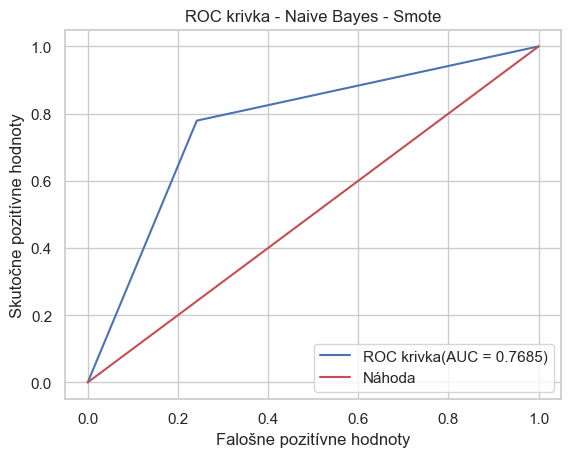

AUC0.7685475208613923


In [26]:
##Bayes SMOTE             
#Vytvorenie modelu Naive Bayes a následne trenovanie a vytvorenie novej klasifikácie.
modelBC = GaussianNB()
modelBC.fit(x_train_smote, y_train_smote)
resultB = modelBC.predict(x_test_smote)

#Výber najdoležitejších 5 atributov a ich zobrazenie.
selectorB = SelectKBest(chi2, k=5)
selected_train_dataB = selectorB.fit_transform(x_train_smote, y_train_smote)
selected_indicesB = selectorB.get_support(indices=True)
selected_feature_namesB = [x_train_smote.columns[i] for i in selected_indicesB]
#Zobrazenie grafu s dôležitých atribútov.
plt.figure(figsize=(10, 6))
plt.bar(selected_feature_namesB, selectorB.scores_[selected_indicesB])
plt.xlabel("Atribúty")
plt.ylabel("Chi-kvadrát hodnota")
plt.title("Dôležitosť atribútov (chi-kvadrát test)- Naive Bayes- SMOTE")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#Zobrazenie matice zámen a reportu klasifikácie.
ct_bayes_smote = confusion_matrix(y_test_smote, resultB)
print(ct_bayes_smote)                        
print(classification_report(y_test_smote, resultB,digits=4))

#Vytvorenie ROC krivky a vypočítanie AUC hodnoty s následným zobrazením ROC krivky a vypísaním AUC hodnoty.
fprac, tprac, _ = roc_curve(y_test_smote, resultB)
roc_aucac = auc(fprac, tprac)

#Zobrazenie grafu ROC krivky a vypísanie samostatného atribútu AUC. V grafe je AUC zobrazene na 4 desatinné miesta.
plt.plot(fprac, tprac, color='b', label='ROC krivka(AUC = {:.4f})'.format(roc_aucac))
plt.plot([0, 1], [0, 1], color='r',label='Náhoda')
plt.xlabel('Falošne pozitívne hodnoty')
plt.ylabel('Skutočne pozitívne hodnoty')
plt.title('ROC krivka - Naive Bayes - Smote')
plt.legend(loc='lower right')
plt.show()
print('AUC:', roc_aucac)

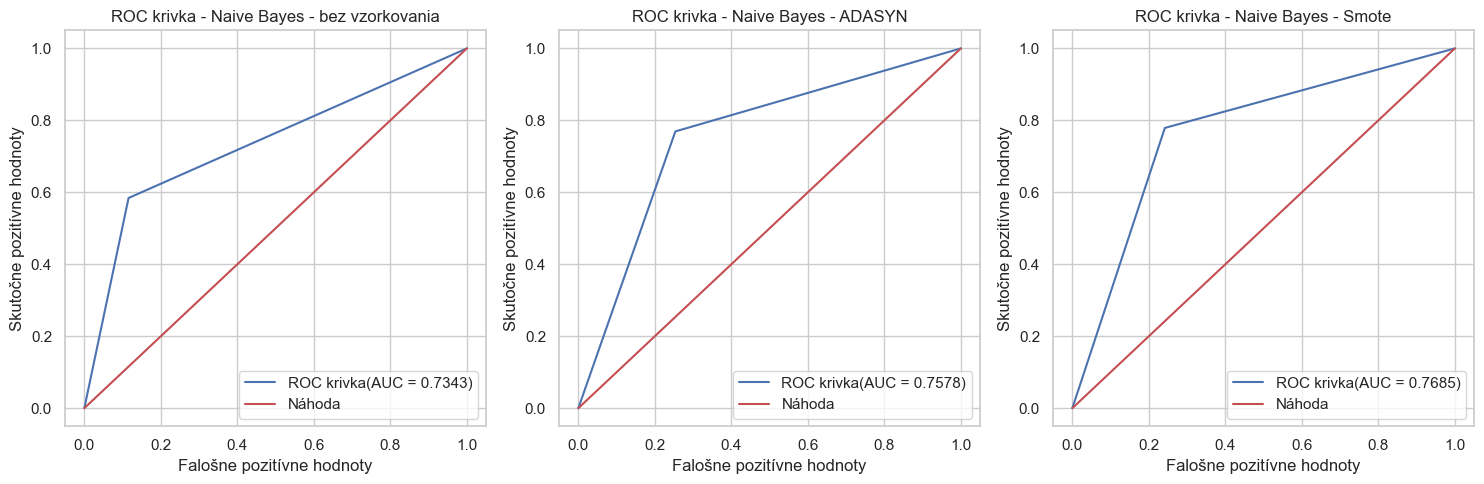

In [27]:
# Vytvorenie grafov ROC kriviek pre Naive Bayes modely s jednotlivými typmi nad vzorkovania. Atriibuty: fpraa,fprab,frpac predstavuju falošne pozitívne hodnoty pre jednotlivé modely a traa,trab,trac predstavuju skutočne pozitívne hodnoty pre jednotlivé modely.
#Bez nad vzorkovania
plt.figure(figsize=(15, 5))
plt.subplot(131)
plt.plot(fpraa, tpraa, color='b', label='ROC krivka(AUC = {:.4f})'.format(roc_aucaa))
plt.plot([0, 1], [0, 1], color='r',label='Náhoda')
plt.xlabel('Falošne pozitívne hodnoty')
plt.ylabel('Skutočne pozitívne hodnoty')
plt.title('ROC krivka - Naive Bayes - bez vzorkovania')
plt.legend(loc='lower right')

#ADASYN nad vzorkovanie
plt.subplot(132)
plt.plot(fprab, tprab, color='b', label='ROC krivka(AUC = {:.4f})'.format(roc_aucab))
plt.plot([0, 1], [0, 1], color='r',label='Náhoda')
plt.xlabel('Falošne pozitívne hodnoty')
plt.ylabel('Skutočne pozitívne hodnoty')
plt.title('ROC krivka - Naive Bayes - ADASYN')
plt.legend(loc='lower right')

#SMOTE nad vzorkovanie
plt.subplot(133)
plt.plot(fprac, tprac, color='b', label='ROC krivka(AUC = {:.4f})'.format(roc_aucac))
plt.plot([0, 1], [0, 1], color='r',label='Náhoda')
plt.xlabel('Falošne pozitívne hodnoty')
plt.ylabel('Skutočne pozitívne hodnoty')
plt.title('ROC krivka - Naive Bayes - Smote')
plt.legend(loc='lower right')

plt.tight_layout()
plt.show()

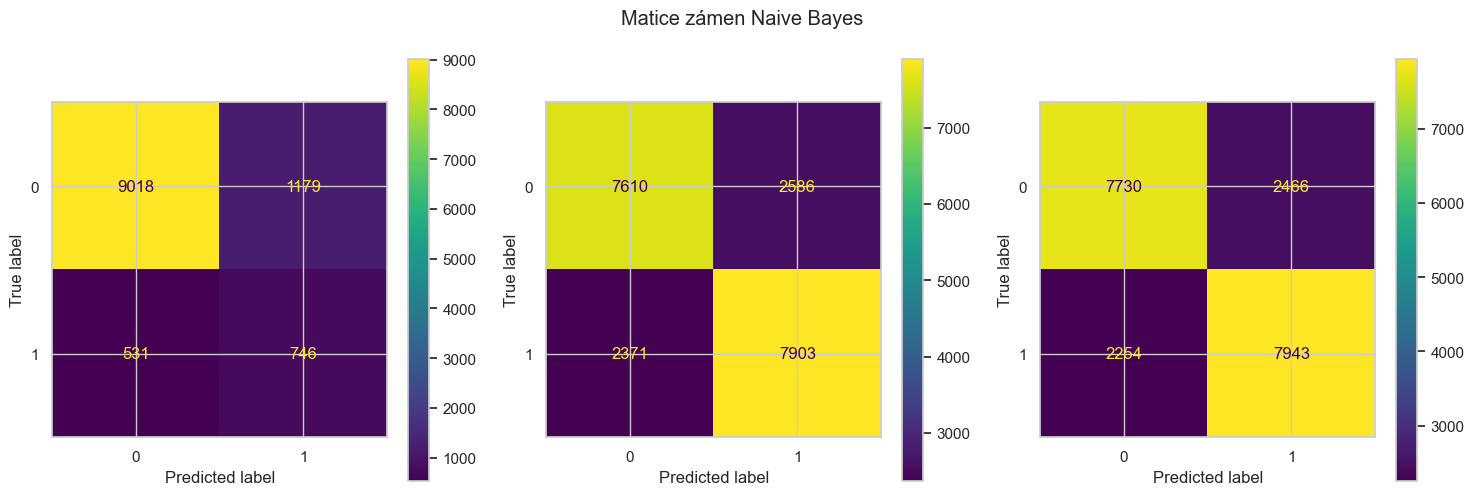

In [28]:
#Zobrazenie matic zámen pre jednotlivé modely Naive Bayes v grafickej podobe pomocou ConfusionMatrixDisplay.
fig,axes = plt.subplots(1,3,figsize=(15,5))

disp_1 = ConfusionMatrixDisplay(ct_bayes)
disp_1.plot(ax=axes[0], cmap="viridis")

disp_2 = ConfusionMatrixDisplay(ct_bayes_adasyn)
disp_2.plot(ax=axes[1], cmap="viridis")

disp_3 = ConfusionMatrixDisplay(ct_bayes_smote)
disp_3.plot(ax=axes[2], cmap="viridis")

fig.suptitle("Matice zámen Naive Bayes")
plt.tight_layout()
plt.show()



# kNN

[[9983  214]
 [1028  249]]
              precision    recall  f1-score   support

           0     0.9066    0.9790    0.9414     10197
           1     0.5378    0.1950    0.2862      1277

    accuracy                         0.8918     11474
   macro avg     0.7222    0.5870    0.6138     11474
weighted avg     0.8656    0.8918    0.8685     11474



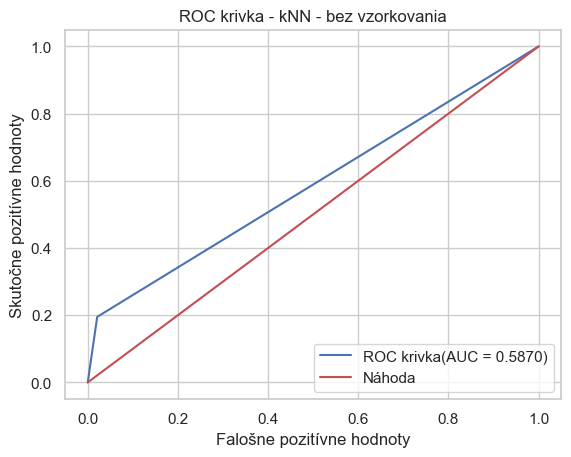

AUC: 0.5870008445218852


In [69]:
##kNN bez nad vzorkovania                                          
#Vytvorenie modelu knn pomocou kNeighborsClassifier funkcie, následné trénovanie modelu a vytvorenie nových klasifikácií.
model1a = KNeighborsClassifier()                          
fitaa = model1a.fit(train_data2, train_label2)                          
res1 = model1a.predict(test_data2)

#Vytvorenie a vypísanie matice zámen a classification reportu.
ct_knn = confusion_matrix(test_label2, res1) 
print(ct_knn)
print(classification_report(test_label2, res1,digits=4))

#Výpočet ROC krivky a AUC metriky.
fprba, tprba, threshold = roc_curve(test_label2, res1)
roc_aucba = auc(fprba, tprba)

#Grafický zobrazená ROC krivka a vypísaná AUC hodnota.
plt.figure()
plt.plot(fprba, tprba, color='b', label='ROC krivka(AUC = {:.4f})'.format(roc_aucba))
plt.plot([0, 1], [0, 1], color='r',label='Náhoda')
plt.xlabel('Falošne pozitívne hodnoty')
plt.ylabel('Skutočne pozitívne hodnoty')
plt.title('ROC krivka - kNN - bez vzorkovania')
plt.legend(loc='lower right')
plt.show()
print('AUC:', roc_aucba)

[[8336 1860]
 [ 867 9407]]
              precision    recall  f1-score   support

           0     0.9058    0.8176    0.8594     10196
           1     0.8349    0.9156    0.8734     10274

    accuracy                         0.8668     20470
   macro avg     0.8704    0.8666    0.8664     20470
weighted avg     0.8702    0.8668    0.8664     20470



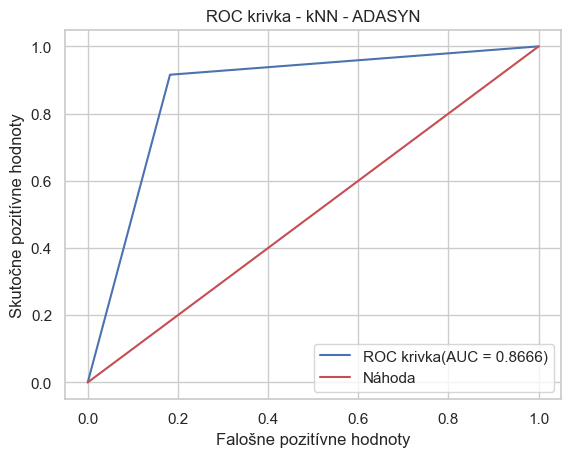

AUC: 0.8665938724228787


In [67]:
#KNN ADASYN
#Vytvorenie modelu knn pomocou kNeighborsClassifier funkcie, následné trénovanie modelu a vytvorenie nových klasifikácií.
model1b = KNeighborsClassifier()
fitab = model1b.fit(x_train_adasyn, y_train_adasyn)                          
res2 = model1b.predict(x_test_adasyn)

#Vytvorenie a vypísanie matice zámen a classification reportu.
ct_knn_adasyn = confusion_matrix(y_test_adasyn, res2)
print(ct_knn_adasyn)  
print(classification_report(y_test_adasyn, res2,digits=4))

# Výpočet ROC krivky
fprbb, tprbb, threshold = roc_curve(y_test_adasyn, res2)
roc_aucbb = auc(fprbb, tprbb)

# Vykreslenie ROC krivky
plt.figure()
plt.plot(fprbb, tprbb, color='b', label='ROC krivka(AUC = {:.4f})'.format(roc_aucbb))
plt.plot([0, 1], [0, 1], color='r',label='Náhoda')
plt.xlabel('Falošne pozitívne hodnoty')
plt.ylabel('Skutočne pozitívne hodnoty')
plt.title('ROC krivka - kNN - ADASYN')
plt.legend(loc='lower right')
plt.show()

# Výpis AUC hodnoty
print('AUC:', roc_aucbb)

[[8473 1723]
 [ 573 9624]]
              precision    recall  f1-score   support

           0     0.9367    0.8310    0.8807     10196
           1     0.8482    0.9438    0.8934     10197

    accuracy                         0.8874     20393
   macro avg     0.8924    0.8874    0.8871     20393
weighted avg     0.8924    0.8874    0.8871     20393



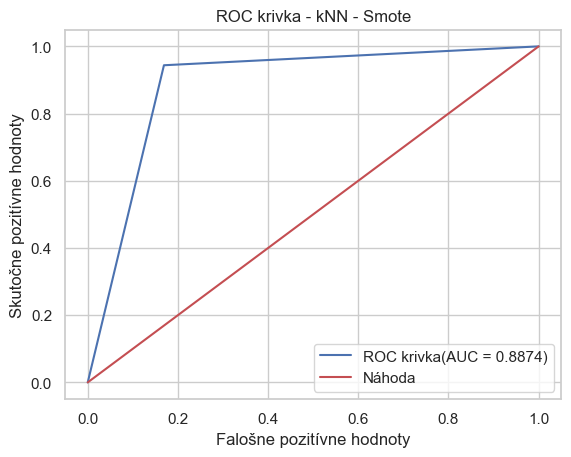

AUC: 0.8874095818457208


In [70]:
##kNN SMOTE

model1c = KNeighborsClassifier()
fitac = model1c.fit(x_train_smote, y_train_smote)
res3 = model1c.predict(x_test_smote)

ct_knn_smote = confusion_matrix(y_test_smote, res3)
print(ct_knn_smote)  
print(classification_report(y_test_smote, res3,digits=4))

# Výpočet ROC krivky
fprbc, tprbc, threshold = roc_curve(y_test_smote, res3)
roc_aucbc = auc(fprbc, tprbc)

# Vykreslenie ROC krivky
plt.figure()
plt.plot(fprbc, tprbc, color='b', label='ROC krivka(AUC = {:.4f})'.format(roc_aucbc))
plt.plot([0, 1], [0, 1], color='r',label='Náhoda')
plt.xlabel('Falošne pozitívne hodnoty')
plt.ylabel('Skutočne pozitívne hodnoty')
plt.title('ROC krivka - kNN - Smote')
plt.legend(loc='lower right')
plt.show()

# Výpis AUC hodnoty
print('AUC:', roc_aucbc)

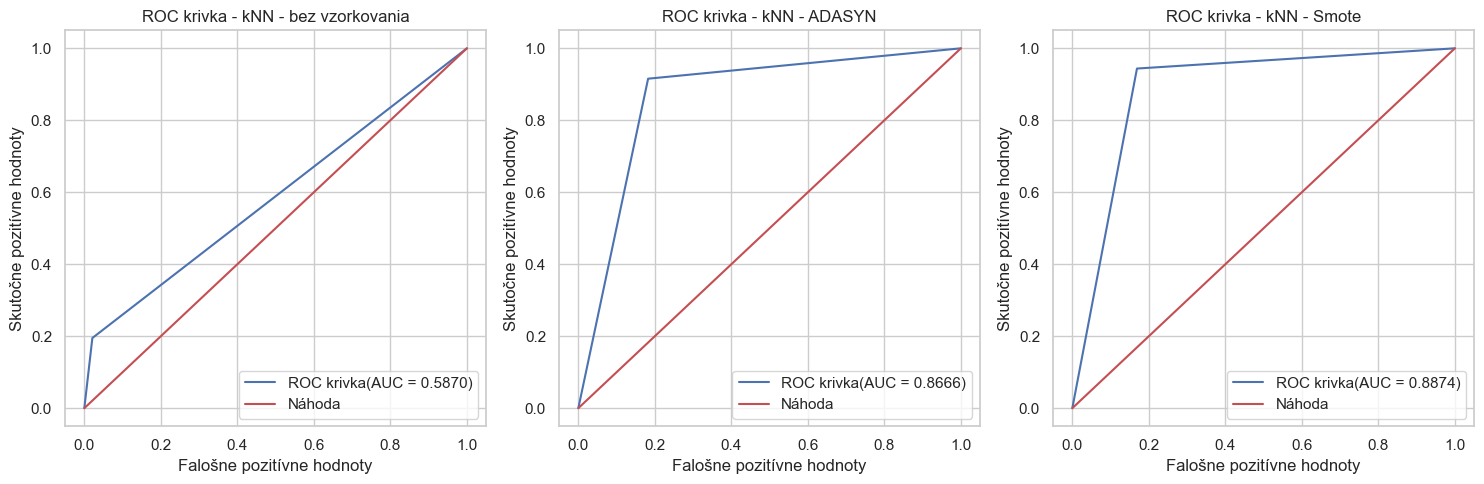

In [71]:
# Vytvorenie grafov ROC kriviek pre kNN modely s jednotlivými typmi nad vzorkovania. Atriibuty: fpraba,fprbb,frpbc predstavuju falošne pozitívne hodnoty pre jednotlivé modely a trba,trbb,trbc predstavuju skutočne pozitívne hodnoty pre jednotlivé modely.
plt.figure(figsize=(15, 5))
#Graf ROC krivky bez vzorkovania
plt.subplot(131)
plt.plot(fprba, tprba, color='b', label='ROC krivka(AUC = {:.4f})'.format(roc_aucba))
plt.plot([0, 1], [0, 1], color='r',label='Náhoda')
plt.xlabel('Falošne pozitívne hodnoty')
plt.ylabel('Skutočne pozitívne hodnoty')
plt.title('ROC krivka - kNN - bez vzorkovania')
plt.legend(loc='lower right')

#Graf ROC krivky modelu ADASYN
plt.subplot(132)
plt.plot(fprbb, tprbb, color='b', label='ROC krivka(AUC = {:.4f})'.format(roc_aucbb))
plt.plot([0, 1], [0, 1], color='r',label='Náhoda')
plt.xlabel('Falošne pozitívne hodnoty')
plt.ylabel('Skutočne pozitívne hodnoty')
plt.title('ROC krivka - kNN - ADASYN')
plt.legend(loc='lower right')

#Graf ROC krivky modelu SMOTE
plt.subplot(133)
plt.plot(fprbc, tprbc, color='b', label='ROC krivka(AUC = {:.4f})'.format(roc_aucbc))
plt.plot([0, 1], [0, 1], color='r',label='Náhoda')
plt.xlabel('Falošne pozitívne hodnoty')
plt.ylabel('Skutočne pozitívne hodnoty')
plt.title('ROC krivka - kNN - Smote')
plt.legend(loc='lower right')

plt.tight_layout()
plt.show()

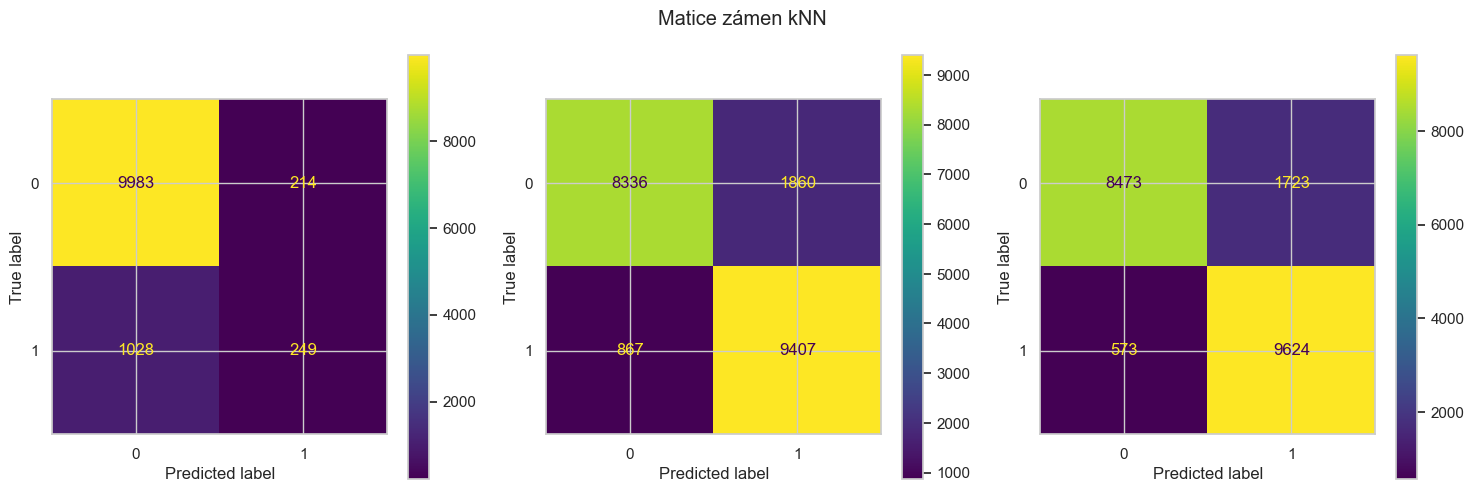

In [72]:
#Zobrazenie matic zámen pre jednotlivé modely kNN v grafickej podobe pomocou ConfusionMatrixDisplay.
fig,axes = plt.subplots(1,3,figsize=(15,5))

disp_1 = ConfusionMatrixDisplay(ct_knn)
disp_1.plot(ax=axes[0], cmap="viridis", values_format="d")

disp_2 = ConfusionMatrixDisplay(ct_knn_adasyn)
disp_2.plot(ax=axes[1], cmap="viridis")

disp_3 = ConfusionMatrixDisplay(ct_knn_smote)
disp_3.plot(ax=axes[2], cmap="viridis")

fig.suptitle("Matice zámen kNN")
plt.tight_layout()
plt.show()

# RF

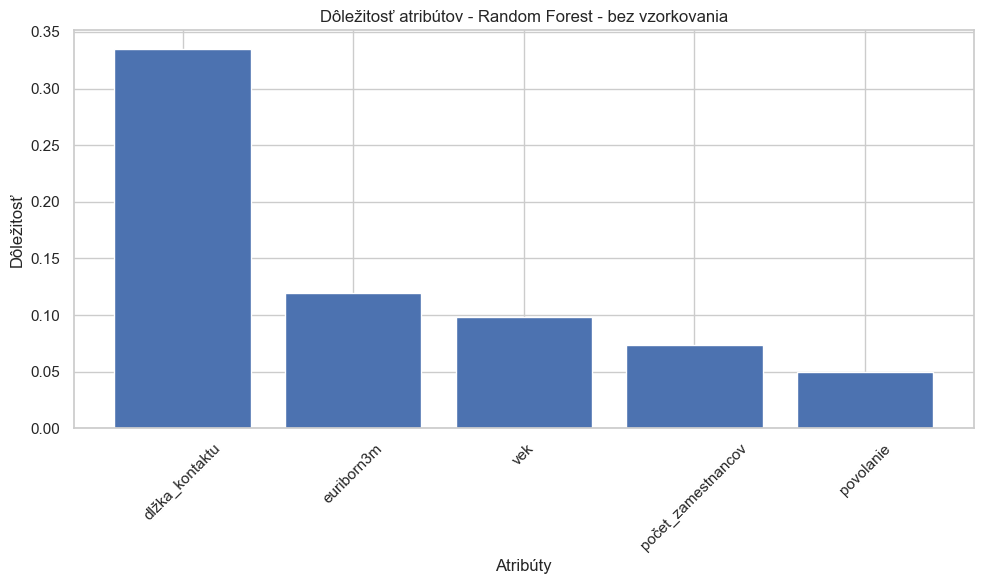

[[9858  339]
 [ 621  656]]
              precision    recall  f1-score   support

           0     0.9407    0.9668    0.9536     10197
           1     0.6593    0.5137    0.5775      1277

    accuracy                         0.9163     11474
   macro avg     0.8000    0.7402    0.7655     11474
weighted avg     0.9094    0.9163    0.9117     11474



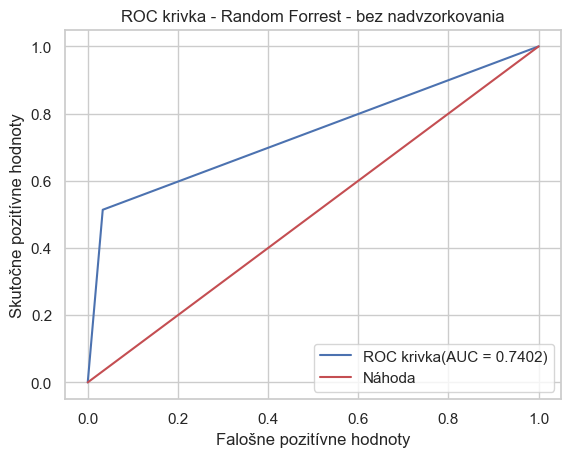

AUC: 0.7402294608276467


In [34]:
##Random Forrest bez vzorkovania
#Vytvorenie modelu Random forest pomocou funkcie RandomForestClassifier, natrénovanie modelu a vytvorenie novej klasifikácie do premennej pred. Parameter random_state pre dosahovanie reprodukovateľných výsledkov.
model_rfA = RandomForestClassifier(random_state=0)
model_rfA.fit(train_data2, train_label2)
pred = model_rfA.predict(test_data2)

#Získanie 5 najdôležitejších atribútov pri trénovaní daného modelu a zobrezenie týchto atribútov na grafe.
importances_rfA = model_rfA.feature_importances_
sorted_indicesA = importances_rfA.argsort()[::-1]
top_feature_indicesA = sorted_indicesA[:5]
top_feature_namesA = [train_data2.columns[i] for i in top_feature_indicesA]
#Zobrazenie najdôležitejších atribútov na grafe.
plt.figure(figsize=(10, 6))
plt.bar(top_feature_namesA, importances_rfA[top_feature_indicesA])
plt.xlabel("Atribúty")
plt.ylabel("Dôležitosť")
plt.title("Dôležitosť atribútov - Random Forest - bez vzorkovania")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#Vytvorenie a vypísanie matice zámen s classification reportu
ct_rf = confusion_matrix(test_label2, pred)
print(ct_rf)  
print(classification_report(test_label2, pred,digits=4))

#Výpočet ROC krivky a AUC hodnoty
fprca, tprca, threshold = roc_curve(test_label2, pred)
roc_aucca = auc(fprca, tprca)

#Vykreslenie ROC krivky a vypísanie AUC hodnoty
plt.figure()
plt.plot(fprca, tprca, color='b', label='ROC krivka(AUC = {:.4f})'.format(roc_aucca))
plt.plot([0, 1], [0, 1], color='r',label='Náhoda')
plt.xlabel('Falošne pozitívne hodnoty')
plt.ylabel('Skutočne pozitívne hodnoty')
plt.title('ROC krivka - Random Forrest - bez nadvzorkovania')
plt.legend(loc='lower right')
plt.show()
print('AUC:', roc_aucca)

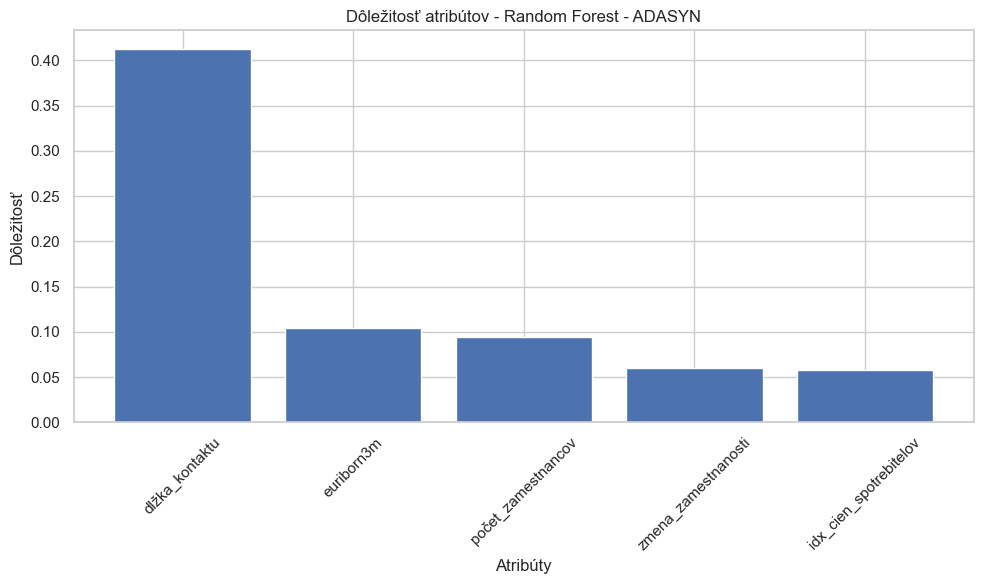

[[9551  645]
 [ 359 9915]]
              precision    recall  f1-score   support

           0     0.9638    0.9367    0.9501     10196
           1     0.9389    0.9651    0.9518     10274

    accuracy                         0.9510     20470
   macro avg     0.9513    0.9509    0.9509     20470
weighted avg     0.9513    0.9510    0.9509     20470



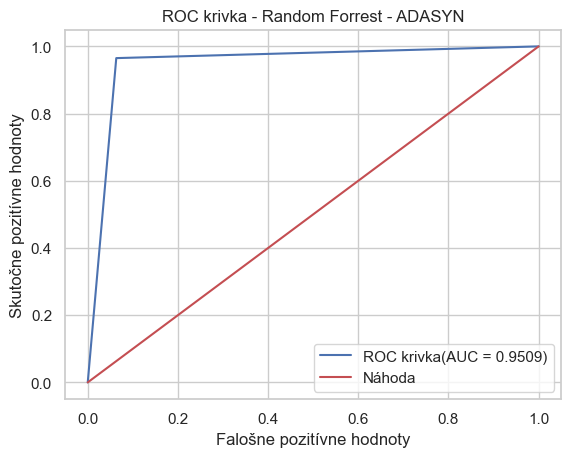

AUC: 0.9508986622563723


In [35]:
##Random Forrest adasyn
#Vytvorenie modelu Random forest pomocou funkcie RandomForestClassifier, natrénovanie modelu a vytvorenie novej klasifikácie do premennej pred2. Parameter random_state pre dosahovanie reprodukovateľných výsledkov.
model_rfB = RandomForestClassifier(random_state=0)
model_rfB.fit(x_train_adasyn, y_train_adasyn)
pred2 = model_rfB.predict(x_test_adasyn)

#Získanie 5 najdôležitejších atribútov pri trénovaní daného modelu a zobrezenie týchto atribútov na grafe.
importances_rfB = model_rfB.feature_importances_
sorted_indicesB = importances_rfB.argsort()[::-1]
top_feature_indicesB = sorted_indicesB[:5]
top_feature_namesB = [x_train_adasyn.columns[i] for i in top_feature_indicesB]
#Vytvorenie grafu najdôležitejších atribútov.
plt.figure(figsize=(10, 6))
plt.bar(top_feature_namesB, importances_rfB[top_feature_indicesB])
plt.xlabel("Atribúty")
plt.ylabel("Dôležitosť")
plt.title("Dôležitosť atribútov - Random Forest - ADASYN")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#Vytvorenie a vypísanie matice zámen a classification reportu.
ct_rf_adasyn = confusion_matrix(y_test_adasyn, pred2)
print(ct_rf_adasyn)
print(classification_report(y_test_adasyn, pred2,digits=4))

#Vypočítanie ROC krivky a AUC metriky.
fprcb, tprcb, threshold = roc_curve(y_test_adasyn, pred2)
roc_auccb = auc(fprcb, tprcb)

#Vykreslenie ROC krivky a vypísanie AUC metriky.
plt.figure()
plt.plot(fprcb, tprcb, color='b', label='ROC krivka(AUC = {:.4f})'.format(roc_auccb))
plt.plot([0, 1], [0, 1], color='r',label='Náhoda')
plt.xlabel('Falošne pozitívne hodnoty')
plt.ylabel('Skutočne pozitívne hodnoty')
plt.title('ROC krivka - Random Forrest - ADASYN')
plt.legend(loc='lower right')
plt.show()
print('AUC:', roc_auccb)

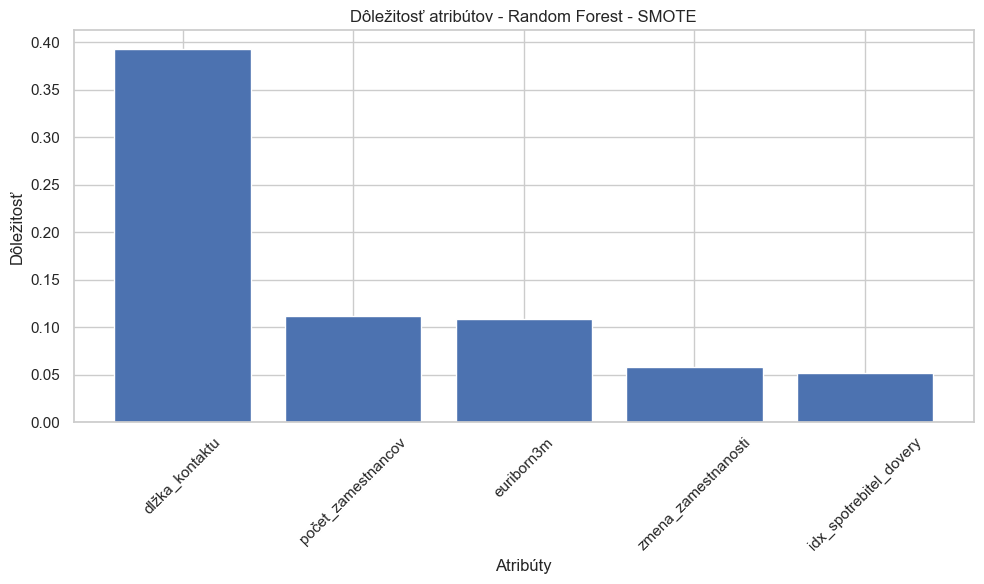

[[9565  631]
 [ 339 9858]]
              precision    recall  f1-score   support

           0     0.9658    0.9381    0.9517     10196
           1     0.9398    0.9668    0.9531     10197

    accuracy                         0.9524     20393
   macro avg     0.9528    0.9524    0.9524     20393
weighted avg     0.9528    0.9524    0.9524     20393



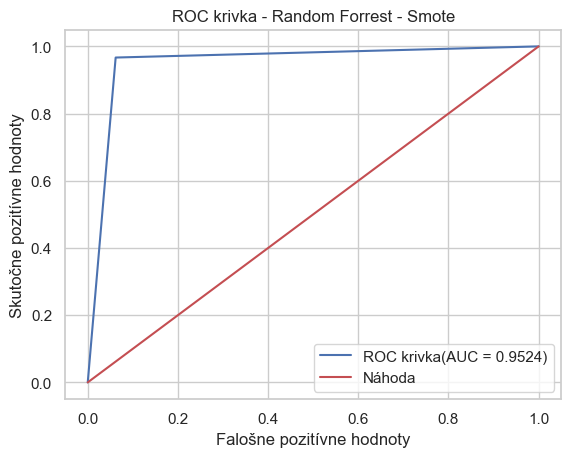

AUC: 0.95243395670224


In [36]:
##Random Forrest smote
#Vytvorenie modelu Random forest pomocou funkcie RandomForestClassifier, natrénovanie modelu a vytvorenie novej klasifikácie do premennej pred3. Parameter random_state pre dosahovanie reprodukovateľných výsledkov.
model_rfC = RandomForestClassifier(random_state=0)
model_rfC.fit(x_train_smote, y_train_smote)
pred3 = model_rfC.predict(x_test_smote)

#Získanie 5 najdôležitejších atribútov pri trénovaní daného modelu a zobrezenie týchto atribútov na grafe.
importances_rfC = model_rfC.feature_importances_
sorted_indicesC = importances_rfC.argsort()[::-1]
top_feature_indicesC = sorted_indicesC[:5]
top_feature_namesC = [x_train_smote.columns[i] for i in top_feature_indicesC]
#Vytvorenie grafu najdôležitejších atribútov.
plt.figure(figsize=(10, 6))
plt.bar(top_feature_namesC, importances_rfC[top_feature_indicesC])
plt.xlabel("Atribúty")
plt.ylabel("Dôležitosť")
plt.title("Dôležitosť atribútov - Random Forest - SMOTE")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#Vytvorenie a vypísanie matice zámen a classification reportu.
ct_rf_smote = confusion_matrix(y_test_smote, pred3)
print(ct_rf_smote)
print(classification_report(y_test_smote, pred3,digits=4))

#Vypočítanie ROC krivky a AUC metriky.
fprcc, tprcc, threshold = roc_curve(y_test_smote, pred3)
roc_auccc = auc(fprcc, tprcc)

#Vykreslenie ROC krivky a vypísanie AUC metriky.
plt.figure()
plt.plot(fprcc, tprcc, color='b', label='ROC krivka(AUC = {:.4f})'.format(roc_auccc))
plt.plot([0, 1], [0, 1], color='r',label='Náhoda')
plt.xlabel('Falošne pozitívne hodnoty')
plt.ylabel('Skutočne pozitívne hodnoty')
plt.title('ROC krivka - Random Forrest - Smote')
plt.legend(loc='lower right')
plt.show()
# Výpis AUC hodnoty
print('AUC:', roc_auccc)

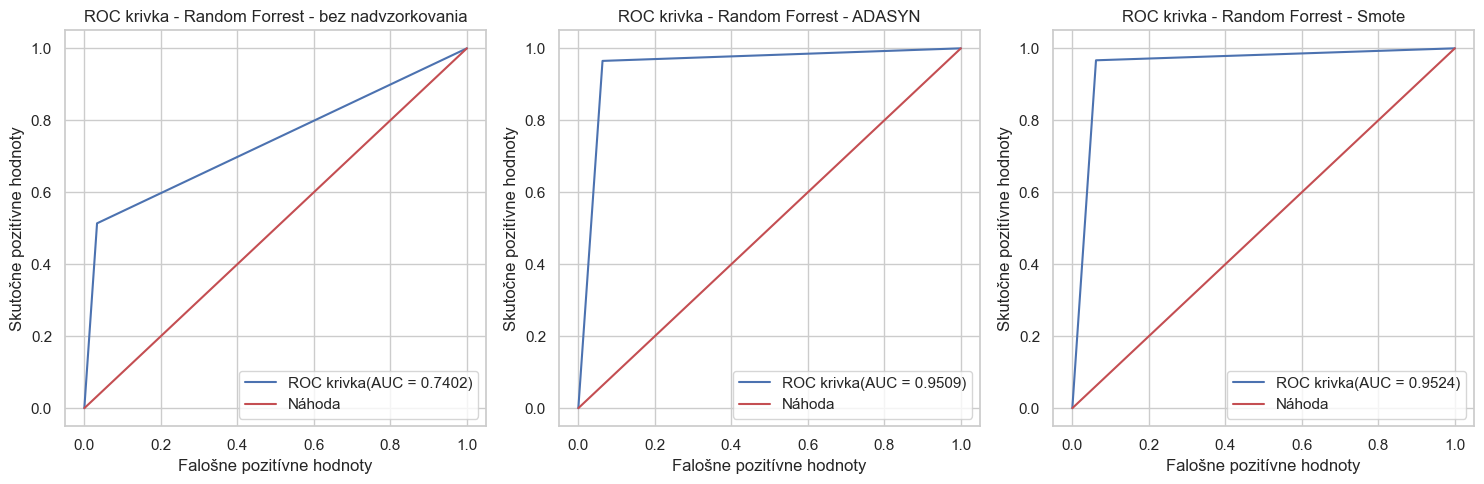

In [37]:
# Vytvorenie grafov ROC kriviek pre kNN modely s jednotlivými typmi nad vzorkovania. Atriibuty: fprca,fprcb,frpcc predstavuju falošne pozitívne hodnoty pre jednotlivé modely a trca,trcb,trcc predstavuju skutočne pozitívne hodnoty pre jednotlivé modely.
plt.figure(figsize=(15, 5))
#Graf ROC krivky bez vzorkovania
plt.subplot(131)
plt.plot(fprca, tprca, color='b', label='ROC krivka(AUC = {:.4f})'.format(roc_aucca))
plt.plot([0, 1], [0, 1], color='r',label='Náhoda')
plt.xlabel('Falošne pozitívne hodnoty')
plt.ylabel('Skutočne pozitívne hodnoty')
plt.title('ROC krivka - Random Forrest - bez nadvzorkovania')
plt.legend(loc='lower right')

#Graf ROC krivky modelu ADASYN
plt.subplot(132)
plt.plot(fprcb, tprcb, color='b', label='ROC krivka(AUC = {:.4f})'.format(roc_auccb))
plt.plot([0, 1], [0, 1], color='r',label='Náhoda')
plt.xlabel('Falošne pozitívne hodnoty')
plt.ylabel('Skutočne pozitívne hodnoty')
plt.title('ROC krivka - Random Forrest - ADASYN')
plt.legend(loc='lower right')

#Graf ROC krivky modelu SMOTE
plt.subplot(133)
plt.plot(fprcc, tprcc, color='b', label='ROC krivka(AUC = {:.4f})'.format(roc_auccc))
plt.plot([0, 1], [0, 1], color='r',label='Náhoda')
plt.xlabel('Falošne pozitívne hodnoty')
plt.ylabel('Skutočne pozitívne hodnoty')
plt.title('ROC krivka - Random Forrest - Smote')
plt.legend(loc='lower right')

plt.tight_layout()
plt.show()

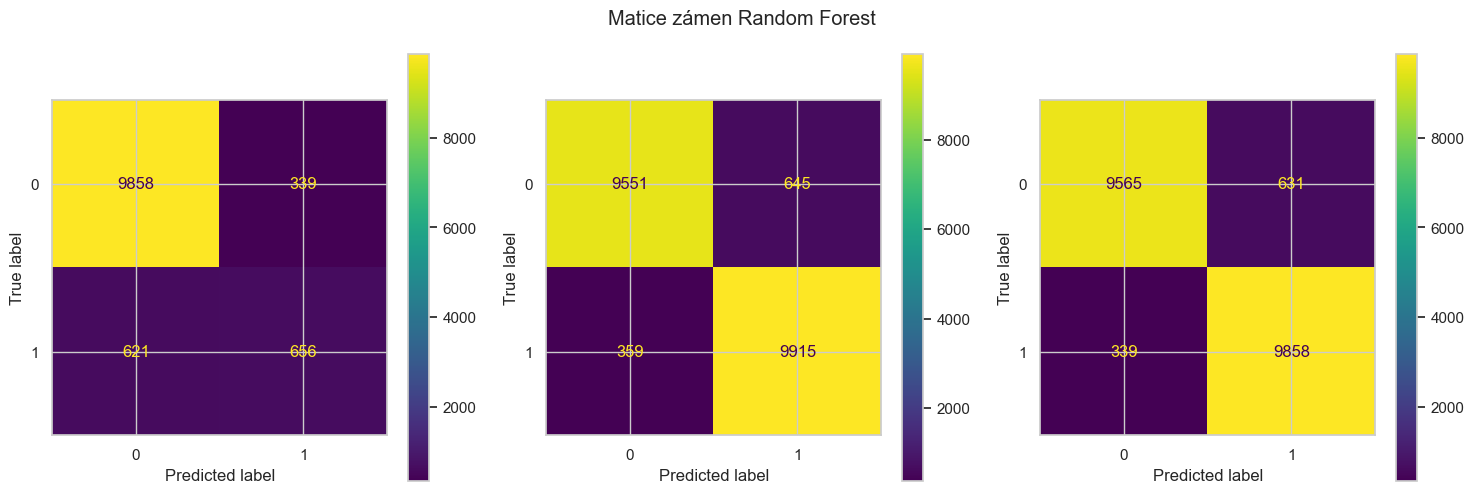

In [38]:
#Zobrazenie matic zámen pre jednotlivé modely Random Forest v grafickej podobe pomocou ConfusionMatrixDisplay.
fig,axes = plt.subplots(1,3,figsize=(15,5))

disp_1 = ConfusionMatrixDisplay(ct_rf)
disp_1.plot(ax=axes[0], cmap="viridis", values_format="d")

disp_2 = ConfusionMatrixDisplay(ct_rf_adasyn)
disp_2.plot(ax=axes[1], cmap="viridis")

disp_3 = ConfusionMatrixDisplay(ct_rf_smote)
disp_3.plot(ax=axes[2], cmap="viridis")

fig.suptitle("Matice zámen Random Forest")
plt.tight_layout()
plt.show()

# DT

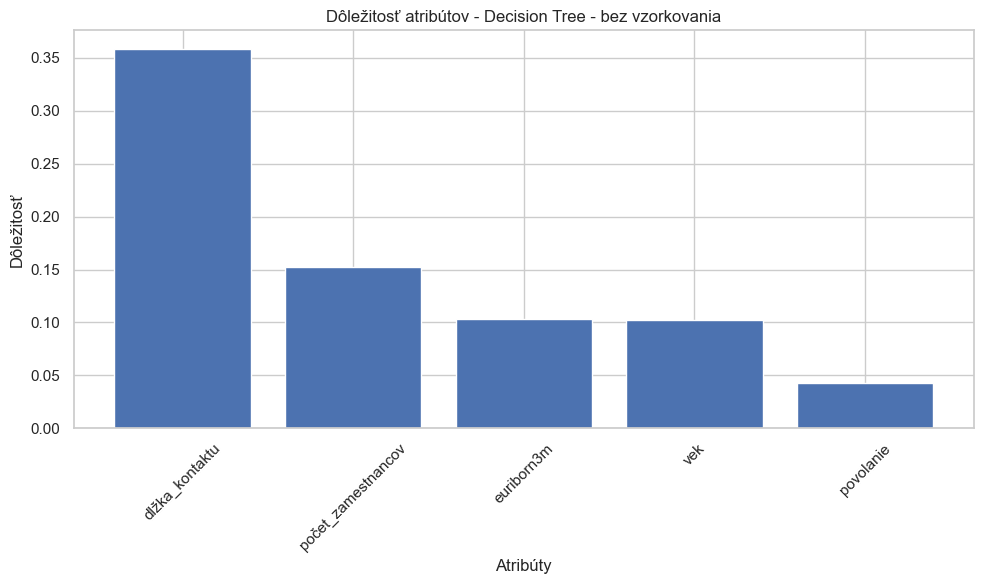

[[9594  603]
 [ 569  708]]
              precision    recall  f1-score   support

           0     0.9440    0.9409    0.9424     10197
           1     0.5400    0.5544    0.5471      1277

    accuracy                         0.8979     11474
   macro avg     0.7420    0.7476    0.7448     11474
weighted avg     0.8991    0.8979    0.8984     11474



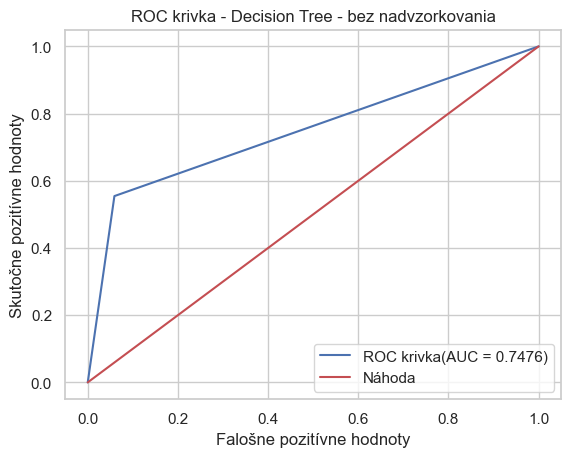

AUC: 0.7476446962727763


In [39]:
##Decision Tree bez nad vzorkovanie
#Vytvorenie modelu pomocou funkcie DecisionTreeClassifier s následovným trénovaním modelu a novou klasifikáciou cieľového atribútu. Opätovné využitie parametra random_state pre reprodukovateľnosť výsledkov.
model_DTA = DecisionTreeClassifier(random_state=0)
model_DTA = model_DTA.fit(train_data2, train_label2)
result = model_DTA.predict(test_data2)

#Získanie 5 najdôležitejších atribútov pri trénovaní modelu a následné grafické zobrazenie modelu.
importances_dtAA = model_DTA.feature_importances_
sorted_indicesAA = importances_dtAA.argsort()[::-1]
top_feature_indicesAA = sorted_indicesAA[:5]
top_feature_namesAA = [train_data2.columns[i] for i in top_feature_indicesAA]
#Grafické zobrazenie najdôležitejších atribútov.
plt.figure(figsize=(10, 6))
plt.bar(top_feature_namesAA, importances_dtAA[top_feature_indicesAA])
plt.xlabel("Atribúty")
plt.ylabel("Dôležitosť")
plt.title("Dôležitosť atribútov - Decision Tree - bez vzorkovania")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#Vytvorenie a vypísanie matice zámen a classification reportu.
ct_dt = confusion_matrix(test_label2, result)
print(ct_dt)
print(classification_report(test_label2, result, digits=4))


#Výpočet ROC krivky a AUC metriky.
fprda, tprda, threshold = roc_curve(test_label2, result)
roc_aucda = auc(fprda, tprda)
#Grafické zobrazenie ROC krivky a vypísanie AUC hodnoty
plt.figure()
plt.plot(fprda, tprda, color='b', label='ROC krivka(AUC = {:.4f})'.format(roc_aucda))
plt.plot([0, 1], [0, 1], color='r',label='Náhoda')
plt.xlabel('Falošne pozitívne hodnoty')
plt.ylabel('Skutočne pozitívne hodnoty')
plt.title('ROC krivka - Decision Tree - bez nadvzorkovania')
plt.legend(loc='lower right')
plt.show()
print('AUC:', roc_aucda)

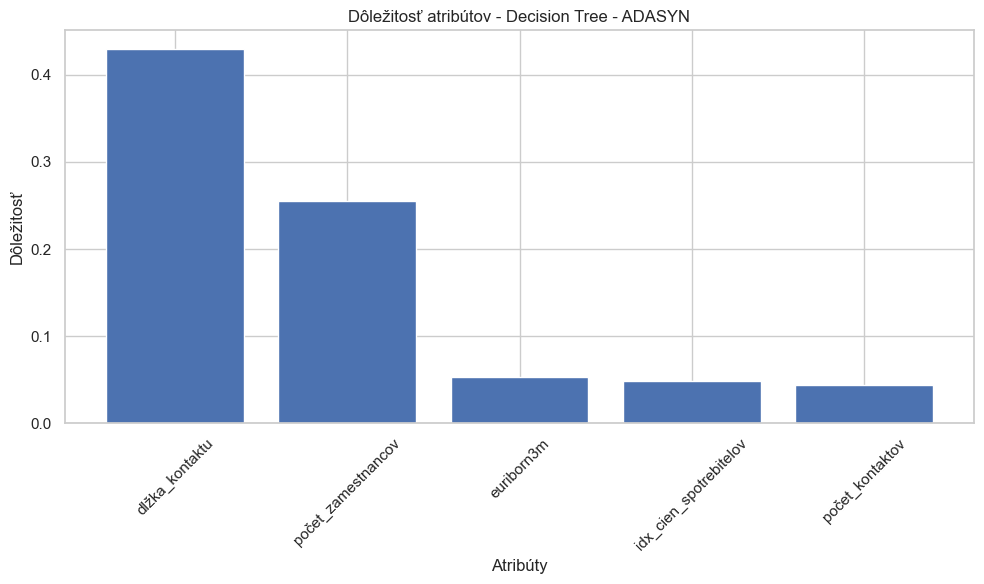

[[9386  810]
 [ 761 9513]]
              precision    recall  f1-score   support

           0     0.9250    0.9206    0.9228     10196
           1     0.9215    0.9259    0.9237     10274

    accuracy                         0.9233     20470
   macro avg     0.9233    0.9232    0.9233     20470
weighted avg     0.9233    0.9233    0.9233     20470



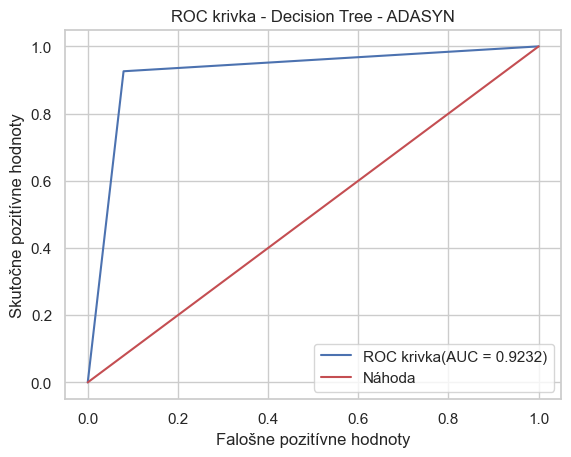

AUC: 0.9232433060314507


In [40]:
##Decision Tree nad vzorkvoanie ADASYN
#Vytvorenie modelu pomocou funkcie DecisionTreeClassifier s následovným trénovaním modelu a novou klasifikáciou cieľového atribútu. Opätovné využitie parametra random_state pre reprodukovateľnosť výsledkov.
model_DTB = DecisionTreeClassifier(random_state=0)
model_DTB = model_DTB.fit(x_train_adasyn, y_train_adasyn)
result2 = model_DTB.predict(x_test_adasyn)

#Získanie 5 najdôležitejších atribútov a následné grafické zobrazenie týchto atribútov.
importances_dtBB = model_DTB.feature_importances_
sorted_indicesBB = importances_dtBB.argsort()[::-1]
top_feature_indicesBB = sorted_indicesBB[:5]
top_feature_namesBB = [x_train_adasyn.columns[i] for i in top_feature_indicesBB]
#Grafické zobrazenie najdôležitejších atribútov.
plt.figure(figsize=(10, 6))
plt.bar(top_feature_namesBB, importances_dtBB[top_feature_indicesBB])
plt.xlabel("Atribúty")
plt.ylabel("Dôležitosť")
plt.title("Dôležitosť atribútov - Decision Tree - ADASYN")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#Vytvorenie a vypísanie matice zámen a classification reportu.
ct_dt_adasyn = confusion_matrix(y_test_adasyn, result2)
print(ct_dt_adasyn)
print(classification_report(y_test_adasyn, result2, digits=4))

#Vypočítanie ROC krivky a AUC metriky a následné grafické zobrazenie ROC krivky a vypísanie AUC metriky.
fprdb, tprdb, threshold = roc_curve(y_test_adasyn, result2)
roc_aucdb = auc(fprdb, tprdb)

#Vykreslenie ROC krivky a vyísanie AUC hodnoty.
plt.figure()
plt.plot(fprdb, tprdb, color='b', label='ROC krivka(AUC = {:.4f})'.format(roc_aucdb))
plt.plot([0, 1], [0, 1], color='r',label='Náhoda')
plt.xlabel('Falošne pozitívne hodnoty')
plt.ylabel('Skutočne pozitívne hodnoty')
plt.title('ROC krivka - Decision Tree - ADASYN')
plt.legend(loc='lower right')
plt.show()
print('AUC:', roc_aucdb)


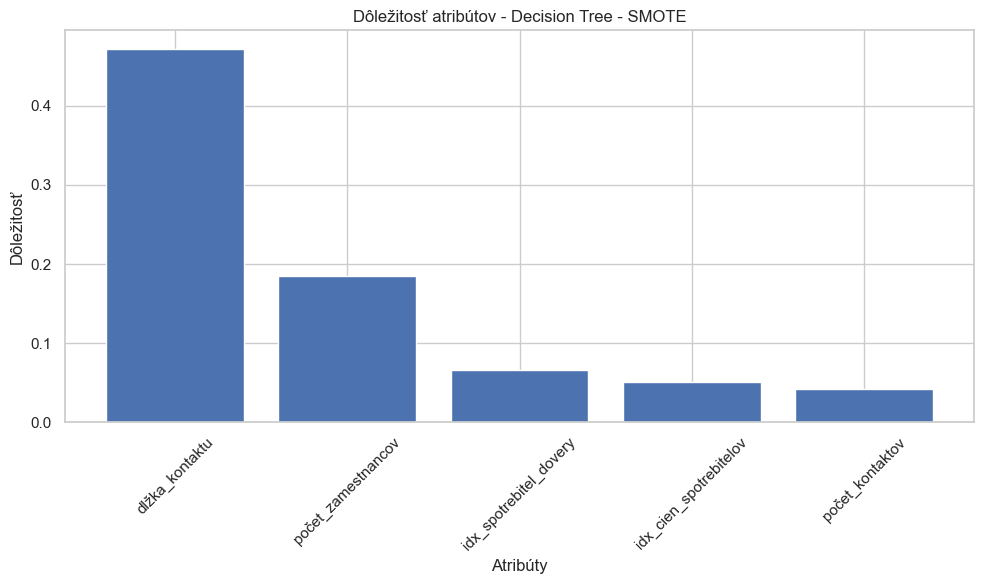

[[9396  800]
 [ 725 9472]]
              precision    recall  f1-score   support

           0     0.9284    0.9215    0.9249     10196
           1     0.9221    0.9289    0.9255     10197

    accuracy                         0.9252     20393
   macro avg     0.9252    0.9252    0.9252     20393
weighted avg     0.9252    0.9252    0.9252     20393



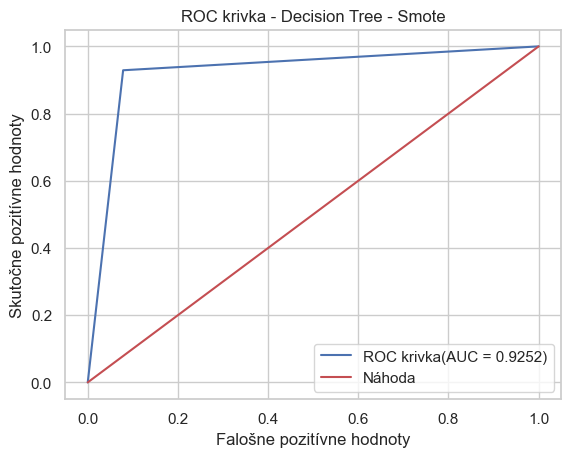

AUC: 0.9252192575197599


In [41]:
##Decision Tree nad vzorkovanie SMOTE.
#Vytvorenie modelu pomocou funkcie DecisionTreeClassifier s následovným trénovaním modelu a novou klasifikáciou cieľového atribútu. Opätovné využitie parametra random_state pre reprodukovateľnosť výsledkov.
model_DTC = DecisionTreeClassifier(random_state=0)
model_DTC = model_DTC.fit(x_train_smote, y_train_smote)
result3 = model_DTC.predict(x_test_smote)

#Získanie 5 najdôležitejších atribútov a následné grafické zobrazenie týchto atribútov.
importances_dtCC = model_DTC.feature_importances_
sorted_indicesCC = importances_dtCC.argsort()[::-1]
top_feature_indicesCC = sorted_indicesCC[:5]
top_feature_namesCC = [x_train_smote.columns[i] for i in top_feature_indicesCC]
#Grafické zobrazenie najdôležitejších atribútov.
plt.figure(figsize=(10, 6))
plt.bar(top_feature_namesCC, importances_dtCC[top_feature_indicesCC])
plt.xlabel("Atribúty")
plt.ylabel("Dôležitosť")
plt.title("Dôležitosť atribútov - Decision Tree - SMOTE")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#Vytvorenie a vypísanie matice zámen a classification reportu.
ct_dt_smote = confusion_matrix(y_test_smote, result3)
print(ct_dt_smote)
print(classification_report(y_test_smote, result3,digits=4))

#Vypočítanie ROC krivky a AUC metriky a následné grafické zobrazenie ROC krivky a vypísanie AUC metriky.
fprdc, tprdc, threshold = roc_curve(y_test_smote, result3)
roc_aucdc = auc(fprdc, tprdc)

#Vykreslenie ROC krivky a vyísanie AUC hodnoty.
plt.figure()
plt.plot(fprdc, tprdc, color='b', label='ROC krivka(AUC = {:.4f})'.format(roc_aucdc))
plt.plot([0, 1], [0, 1], color='r',label='Náhoda')
plt.xlabel('Falošne pozitívne hodnoty')
plt.ylabel('Skutočne pozitívne hodnoty')
plt.title('ROC krivka - Decision Tree - Smote')
plt.legend(loc='lower right')
plt.show()
print('AUC:', roc_aucdc)

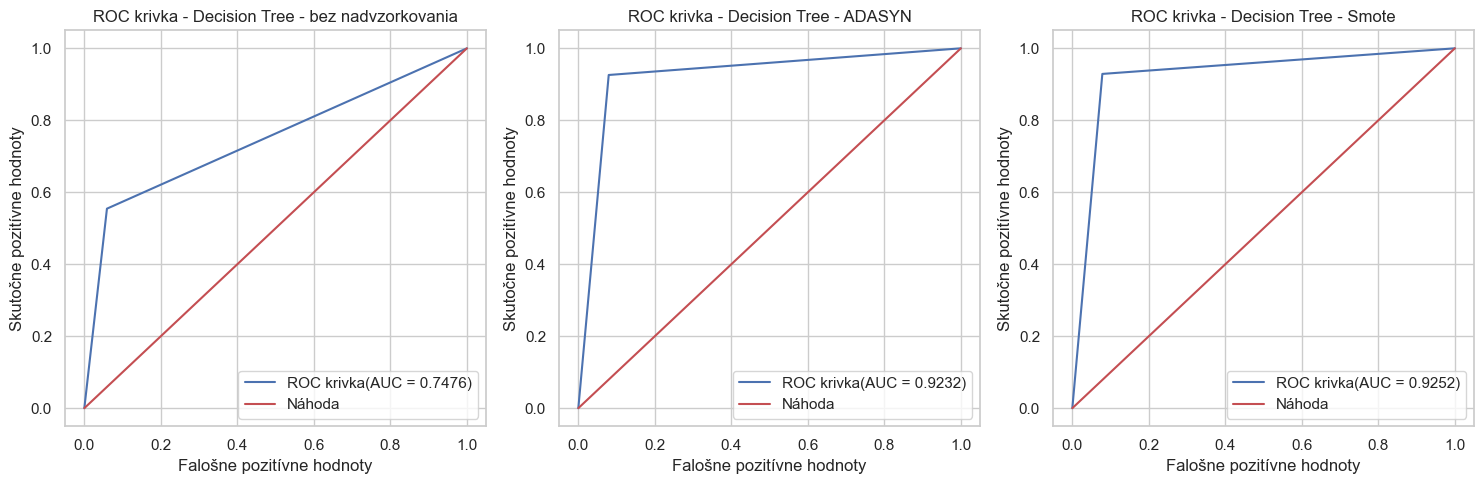

In [42]:
# Vytvorenie grafov ROC kriviek pre Decision Tree modely s jednotlivými typmi nad vzorkovania. Atriibuty: fprda,fprdb,frpdc predstavuju falošne pozitívne hodnoty pre jednotlivé modely a trda,trdb,trdc predstavuju skutočne pozitívne hodnoty pre jednotlivé modely.
plt.figure(figsize=(15, 5))
#Graf ROC krivky bez vzorkovania
plt.subplot(131)
plt.plot(fprda, tprda, color='b', label='ROC krivka(AUC = {:.4f})'.format(roc_aucda))
plt.plot([0, 1], [0, 1], color='r',label='Náhoda')
plt.xlabel('Falošne pozitívne hodnoty')
plt.ylabel('Skutočne pozitívne hodnoty')
plt.title('ROC krivka - Decision Tree - bez nadvzorkovania')
plt.legend(loc='lower right')

#Graf ROC krivky s nad vzorkovaním ADASYN
plt.subplot(132)
plt.plot(fprdb, tprdb, color='b', label='ROC krivka(AUC = {:.4f})'.format(roc_aucdb))
plt.plot([0, 1], [0, 1], color='r',label='Náhoda')
plt.xlabel('Falošne pozitívne hodnoty')
plt.ylabel('Skutočne pozitívne hodnoty')
plt.title('ROC krivka - Decision Tree - ADASYN')
plt.legend(loc='lower right')

#Graf ROC krivky s nad vzorkovaním SMOTE
plt.subplot(133)
plt.plot(fprdc, tprdc, color='b', label='ROC krivka(AUC = {:.4f})'.format(roc_aucdc))
plt.plot([0, 1], [0, 1], color='r',label='Náhoda')
plt.xlabel('Falošne pozitívne hodnoty')
plt.ylabel('Skutočne pozitívne hodnoty')
plt.title('ROC krivka - Decision Tree - Smote')
plt.legend(loc='lower right')

plt.tight_layout()
plt.show()

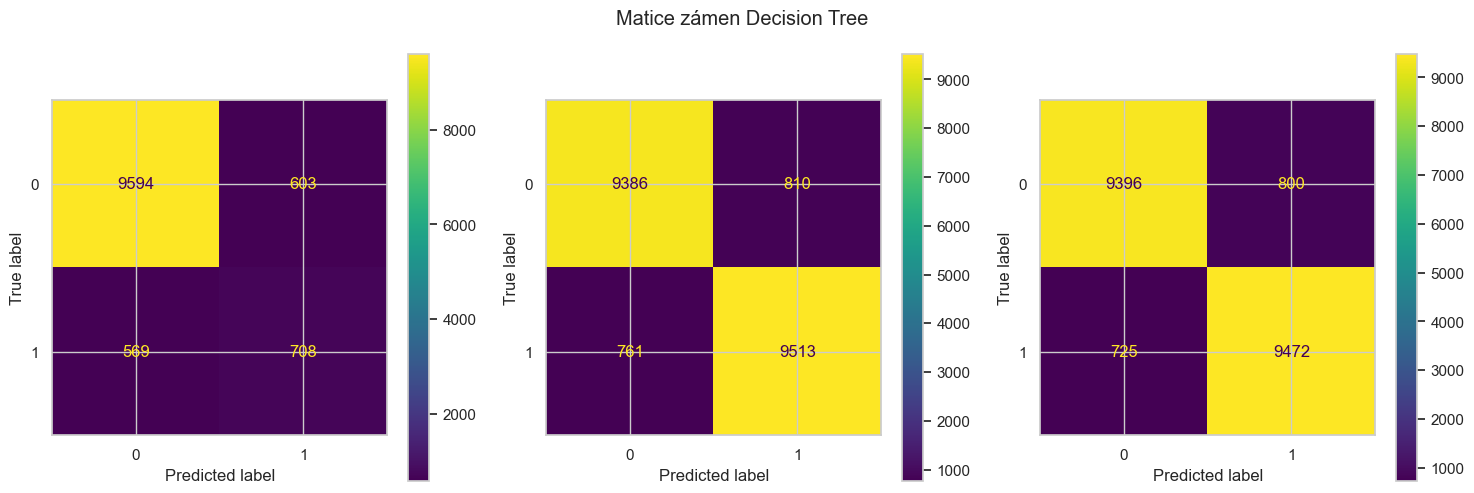

In [43]:
#Zobrazenie matic zámen pre jednotlivé modely Decision Tree v grafickej podobe pomocou ConfusionMatrixDisplay.
fig,axes = plt.subplots(1,3,figsize=(15,5))

disp_1 = ConfusionMatrixDisplay(ct_dt)
disp_1.plot(ax=axes[0], cmap="viridis", values_format="d")

disp_2 = ConfusionMatrixDisplay(ct_dt_adasyn)
disp_2.plot(ax=axes[1], cmap="viridis")

disp_3 = ConfusionMatrixDisplay(ct_dt_smote)
disp_3.plot(ax=axes[2], cmap="viridis")

fig.suptitle("Matice zámen Decision Tree")
plt.tight_layout()
plt.show()

# SVM

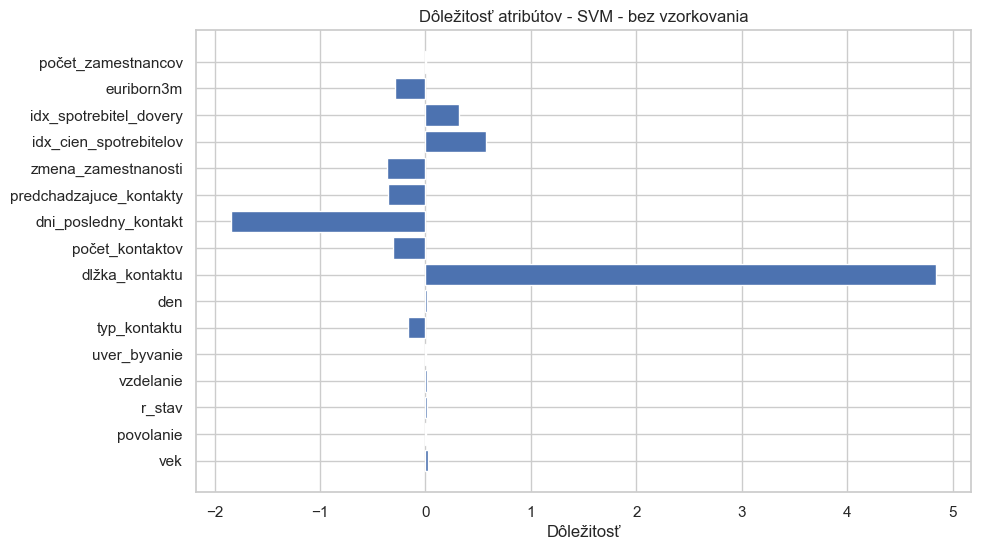

[[10013   184]
 [  978   299]]
              precision    recall  f1-score   support

           0     0.9110    0.9820    0.9452     10197
           1     0.6190    0.2341    0.3398      1277

    accuracy                         0.8987     11474
   macro avg     0.7650    0.6080    0.6425     11474
weighted avg     0.8785    0.8987    0.8778     11474



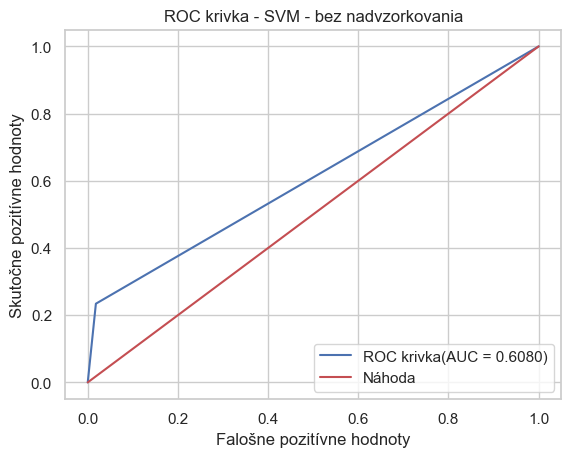

AUC: 0.6080489993179777


In [44]:
#SVM bez nad vzorkovania
#Vytvorenie modelu SVM s následným trénovaním na trénovacích dátach a vytvorenie novej klasifikácie. Parameter karnel sme zvolili lineár. Random state parameter zvoleny 9 pre lepšiu reprodukovateľnosť výsledkov.
model_SVMA = SVC(kernel='linear',random_state=0)
model_SVMA = model_SVMA.fit(train_data2, train_label2)
result = model_SVMA.predict(test_data2)

#Nájdenie dôležitých atribútov a ich následné vypísanie
importances_svmAA = model_SVMA.coef_[0]
feature_namesAA = train_data2.columns
#Grafické zobrazenie dôležitých atribútov.
plt.figure(figsize=(10, 6))
plt.barh(feature_namesAA, importances_svmAA)
plt.xlabel("Dôležitosť")
plt.title("Dôležitosť atribútov - SVM - bez vzorkovania")
plt.show()

#Vytvorenie a vypísanie matice zámen a classification reportu.
ct_svm = confusion_matrix(test_label2, result)
print(ct_svm)
print(classification_report(test_label2, result,digits=4))

#Výpočet ROC krivky a AUC metriky.
fprea, tprea, threshold = roc_curve(test_label2, result)
roc_aucea = auc(fprea, tprea)
#Grafické zobrazenie ROC krivky a vypísanie AUC hodnoty
plt.figure()
plt.plot(fprea, tprea, color='b', label='ROC krivka(AUC = {:.4f})'.format(roc_aucea))
plt.plot([0, 1], [0, 1], color='r',label='Náhoda')
plt.xlabel('Falošne pozitívne hodnoty')
plt.ylabel('Skutočne pozitívne hodnoty')
plt.title('ROC krivka - SVM - bez nadvzorkovania')
plt.legend(loc='lower right')
plt.show()
print('AUC:', roc_aucea)

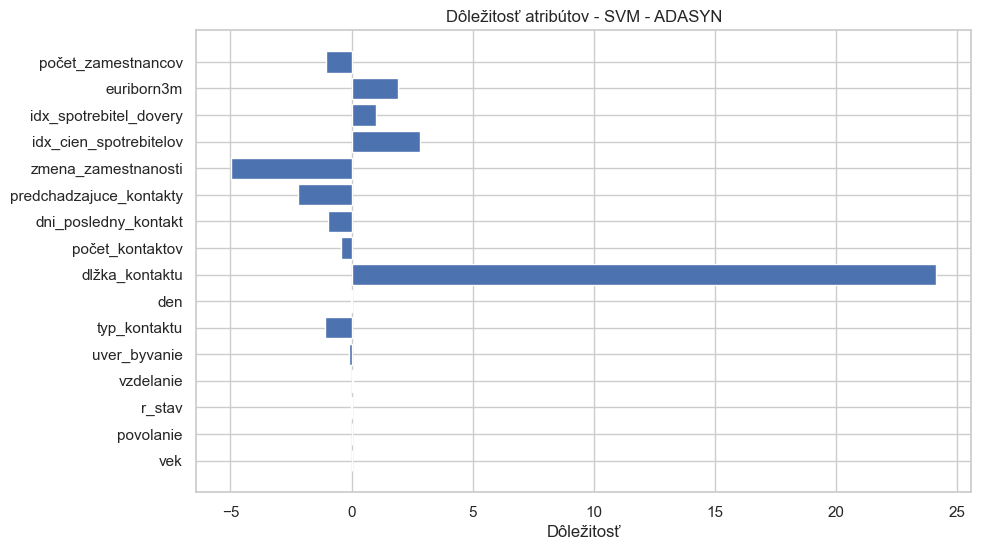

[[8679 1517]
 [ 968 9306]]
              precision    recall  f1-score   support

           0     0.8997    0.8512    0.8748     10196
           1     0.8598    0.9058    0.8822     10274

    accuracy                         0.8786     20470
   macro avg     0.8797    0.8785    0.8785     20470
weighted avg     0.8797    0.8786    0.8785     20470



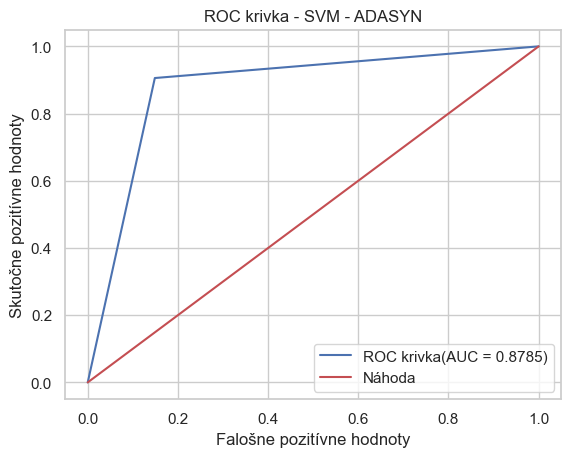

AUC: 0.8784988738918482


In [45]:
# #SVM s nad vzorkovaním ADASYN
#Vytvorenie modelu SVM s následným trénovaním na trénovacích dátach a vytvorenie novej klasifikácie. Parameter karnel sme zvolili lineár. Random state parameter zvoleny 9 pre lepšiu reprodukovateľnosť výsledkov.
model_SVMB = SVC(kernel='linear',random_state=0)
model_SVMB = model_SVMB.fit(x_train_adasyn, y_train_adasyn)
result = model_SVMB.predict(x_test_adasyn)

#Nájdenie dôležitých atribútov a ich následné vypísanie
importances_svmBB = model_SVMB.coef_[0]
feature_namesBB = x_train_adasyn.columns
#Grafické zobrazenie dôležitých atribútov.
plt.figure(figsize=(10, 6))
plt.barh(feature_namesBB, importances_svmBB)
plt.xlabel("Dôležitosť")
plt.title("Dôležitosť atribútov - SVM - ADASYN")
plt.show()

#Vytvorenie a vypísanie matice zámen a classification reportu.
ct_svm_adasyn = confusion_matrix(y_test_adasyn, result)
print(ct_svm_adasyn)
print(classification_report(y_test_adasyn, result,digits=4))

#Výpočet ROC krivky a AUC metriky.
fpreb, tpreb, threshold = roc_curve(y_test_adasyn, result)
roc_auceb = auc(fpreb, tpreb)
#Grafické zobrazenie ROC krivky a vypísanie AUC hodnoty
plt.figure()
plt.plot(fpreb, tpreb, color='b', label='ROC krivka(AUC = {:.4f})'.format(roc_auceb))
plt.plot([0, 1], [0, 1], color='r',label='Náhoda')
plt.xlabel('Falošne pozitívne hodnoty')
plt.ylabel('Skutočne pozitívne hodnoty')
plt.title('ROC krivka - SVM - ADASYN')
plt.legend(loc='lower right')
plt.show()
print('AUC:', roc_auceb)

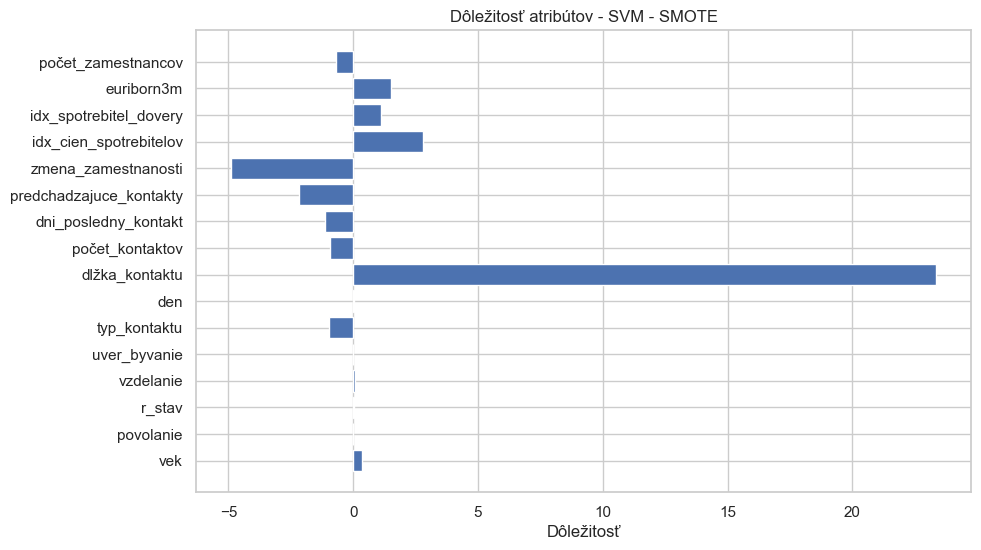

[[8731 1465]
 [1012 9185]]
              precision    recall  f1-score   support

           0     0.8961    0.8563    0.8758     10196
           1     0.8624    0.9008    0.8812     10197

    accuracy                         0.8785     20393
   macro avg     0.8793    0.8785    0.8785     20393
weighted avg     0.8793    0.8785    0.8785     20393



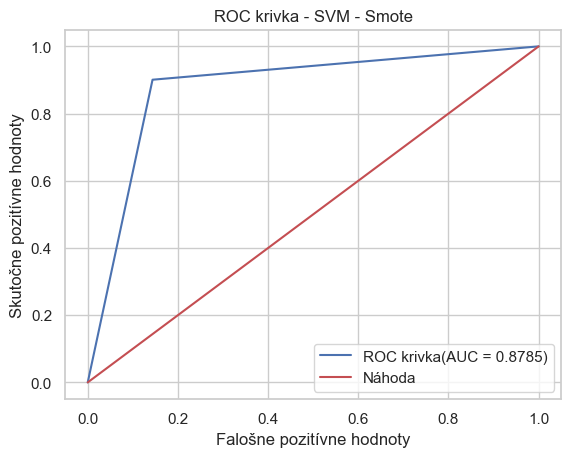

AUC: 0.8785356632442107


In [46]:
#SVM s nad vzorkovaním SMOTE
#Vytvorenie modelu SVM s následným trénovaním na trénovacích dátach a vytvorenie novej klasifikácie. Parameter karnel sme zvolili lineár. Random state parameter zvoleny 9 pre lepšiu reprodukovateľnosť výsledkov.
model_SVMC = SVC(kernel='linear',random_state=0)
model_SVMC = model_SVMC.fit(x_train_smote, y_train_smote)
result = model_SVMC.predict(x_test_smote)

#Nájdenie dôležitých atribútov a ich následné vypísanie
importances_svmCC = model_SVMC.coef_[0]
feature_namesCC = x_train_smote.columns
#Grafické zobrazenie dôležitých atribútov.
plt.figure(figsize=(10, 6))
plt.barh(feature_namesCC, importances_svmCC)
plt.xlabel("Dôležitosť")
plt.title("Dôležitosť atribútov - SVM - SMOTE")
plt.show()

#Vytvorenie a vypísanie matice zámen a classification reportu.
ct_svm_smote = confusion_matrix(y_test_smote, result)
print(ct_svm_smote)
print(classification_report(y_test_smote, result,digits=4))

#Výpočet ROC krivky a AUC metriky.
fprec, tprec, threshold = roc_curve(y_test_smote, result)
roc_aucec = auc(fprec, tprec)
#Grafické zobrazenie ROC krivky a vypísanie AUC hodnoty
plt.figure()
plt.plot(fprec, tprec, color='b', label='ROC krivka(AUC = {:.4f})'.format(roc_aucec))
plt.plot([0, 1], [0, 1], color='r',label='Náhoda')
plt.xlabel('Falošne pozitívne hodnoty')
plt.ylabel('Skutočne pozitívne hodnoty')
plt.title('ROC krivka - SVM - Smote')
plt.legend(loc='lower right')
plt.show()
print('AUC:', roc_aucec)

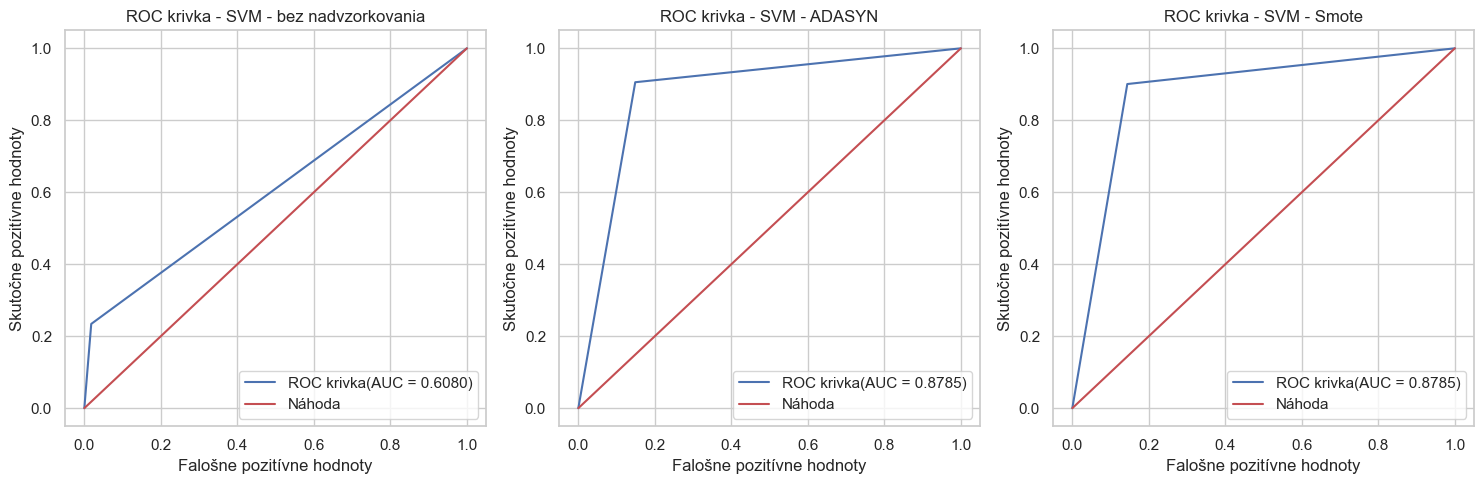

In [47]:
# Vytvorenie grafov ROC kriviek pre SVM modely s jednotlivými typmi nad vzorkovania. Atriibuty: fprea,fpreb,frpec predstavuju falošne pozitívne hodnoty pre jednotlivé modely a trea,treb,trec predstavuju skutočne pozitívne hodnoty pre jednotlivé modely.
plt.figure(figsize=(15, 5))

#Graf ROC krivky bez vzorkovania
plt.subplot(131)
plt.plot(fprea, tprea, color='b', label='ROC krivka(AUC = {:.4f})'.format(roc_aucea))
plt.plot([0, 1], [0, 1], color='r',label='Náhoda')
plt.xlabel('Falošne pozitívne hodnoty')
plt.ylabel('Skutočne pozitívne hodnoty')
plt.title('ROC krivka - SVM - bez nadvzorkovania')
plt.legend(loc='lower right')

#Graf ROC krivky s nad vzorkovaním ADASYN
plt.subplot(132)
plt.plot(fpreb, tpreb, color='b', label='ROC krivka(AUC = {:.4f})'.format(roc_auceb))
plt.plot([0, 1], [0, 1], color='r',label='Náhoda')
plt.xlabel('Falošne pozitívne hodnoty')
plt.ylabel('Skutočne pozitívne hodnoty')
plt.title('ROC krivka - SVM - ADASYN')
plt.legend(loc='lower right')

#Graf ROC krivky s nad vzorkovaním SMOTE
plt.subplot(133)
plt.plot(fprec, tprec, color='b', label='ROC krivka(AUC = {:.4f})'.format(roc_aucec))
plt.plot([0, 1], [0, 1], color='r',label='Náhoda')
plt.xlabel('Falošne pozitívne hodnoty')
plt.ylabel('Skutočne pozitívne hodnoty')
plt.title('ROC krivka - SVM - Smote')
plt.legend(loc='lower right')

plt.tight_layout()
plt.show()

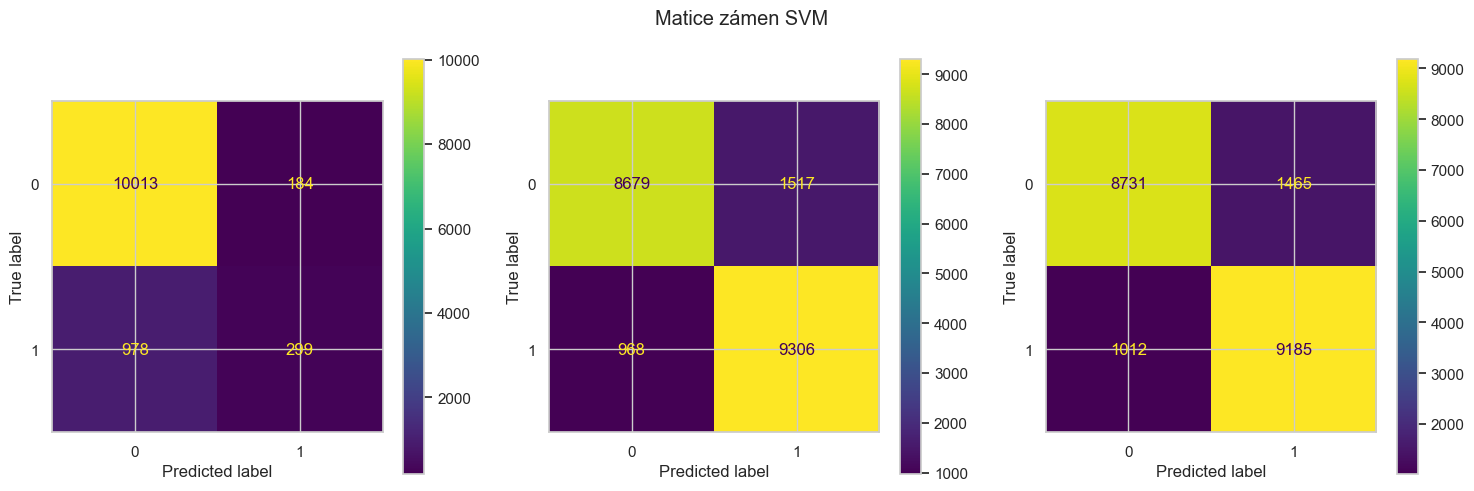

In [48]:
#Zobrazenie matic zámen pre jednotlivé modely SVM v grafickej podobe pomocou ConfusionMatrixDisplay.

fig,axes = plt.subplots(1,3,figsize=(15,5))

disp_1 = ConfusionMatrixDisplay(ct_svm)
disp_1.plot(ax=axes[0], cmap="viridis", values_format="d")

disp_2 = ConfusionMatrixDisplay(ct_svm_adasyn)
disp_2.plot(ax=axes[1], cmap="viridis")

disp_3 = ConfusionMatrixDisplay(ct_svm_smote)
disp_3.plot(ax=axes[2], cmap="viridis")

fig.suptitle("Matice zámen SVM")
plt.tight_layout()
plt.show()

# LR

C:\Users\pc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


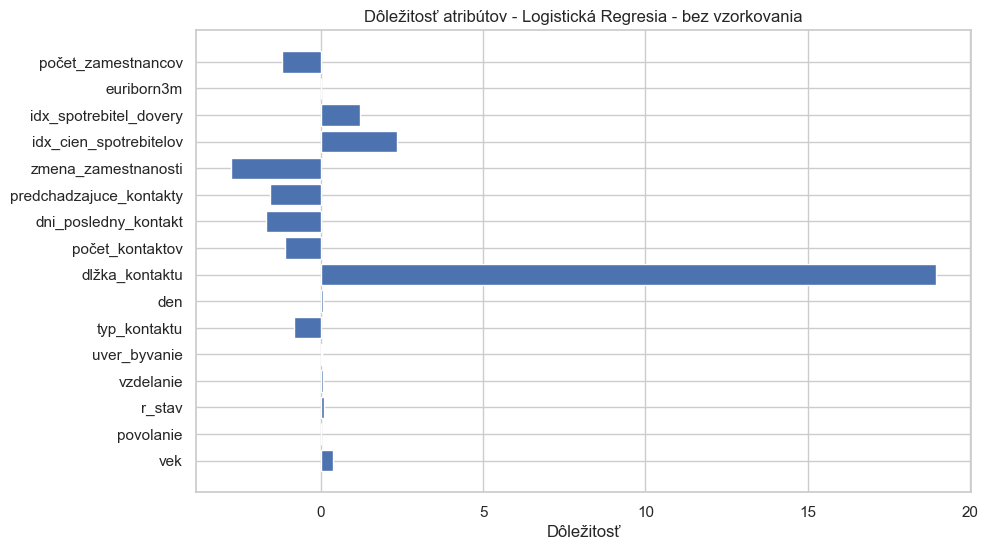

[[9968  229]
 [ 809  468]]
              precision    recall  f1-score   support

           0     0.9249    0.9775    0.9505     10197
           1     0.6714    0.3665    0.4742      1277

    accuracy                         0.9095     11474
   macro avg     0.7982    0.6720    0.7123     11474
weighted avg     0.8967    0.9095    0.8975     11474



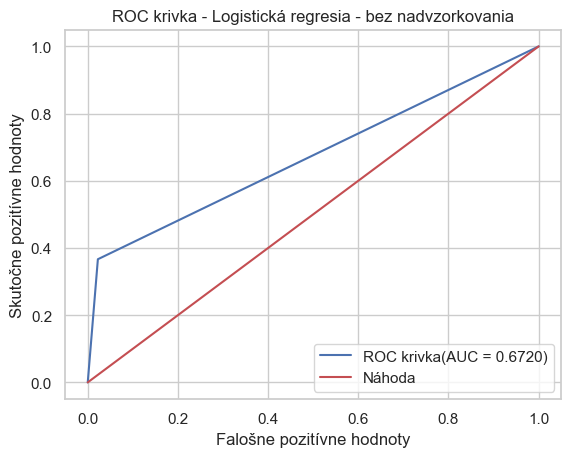

AUC: 0.6720131805929069


In [49]:
#Logistická Regresia bez nad vzorkovania
#Vytvorenie modelu LR s následným trénovaním na trénovacích dátach a vytvorenie novej klasifikácie. Random state parameter zvoleny 0 pre lepšiu reprodukovateľnosť výsledkov.
LM1 = LogisticRegression(random_state=0)
model_LMA = LM1.fit(train_data2, train_label2)
LRresulta = model_LMA.predict(test_data2)

#Nájdenie dôležitých atribútov a ich následné vypísanie
importances_LRa = model_LMA.coef_[0]
feature_namesLRa = train_data2.columns
#Grafické zobrazenie dôležitých atribútov.
plt.figure(figsize=(10, 6))
plt.barh(feature_namesLRa, importances_LRa)
plt.xlabel("Dôležitosť")
plt.title("Dôležitosť atribútov - Logistická Regresia - bez vzorkovania")
plt.show()

#Vytvorenie a vypísanie matice zámen a classification reportu.
ct_lra = confusion_matrix(test_label2, LRresulta) 
print(ct_lra)
print(classification_report(test_label2, LRresulta,digits=4)) 

#Výpočet ROC krivky a AUC metriky.
fprfa, tprfa, threshold = roc_curve(test_label2, LRresulta)
roc_aucfa = auc(fprfa, tprfa)
#Grafické zobrazenie ROC krivky a vypísanie AUC hodnoty
plt.figure()
plt.plot(fprfa, tprfa, color='b', label='ROC krivka(AUC = {:.4f})'.format(roc_aucfa))
plt.plot([0, 1], [0, 1], color='r',label='Náhoda')
plt.xlabel('Falošne pozitívne hodnoty')
plt.ylabel('Skutočne pozitívne hodnoty')
plt.title('ROC krivka - Logistická regresia - bez nadvzorkovania')
plt.legend(loc='lower right')
plt.show()
print('AUC:', roc_aucfa)

C:\Users\pc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


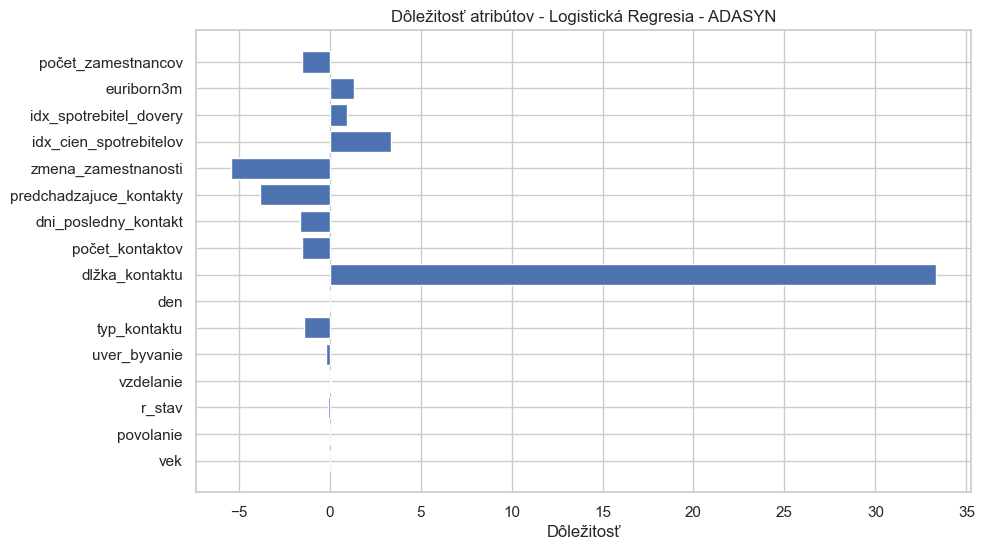

[[8763 1433]
 [1158 9116]]
              precision    recall  f1-score   support

           0     0.8833    0.8595    0.8712     10196
           1     0.8642    0.8873    0.8756     10274

    accuracy                         0.8734     20470
   macro avg     0.8737    0.8734    0.8734     20470
weighted avg     0.8737    0.8734    0.8734     20470



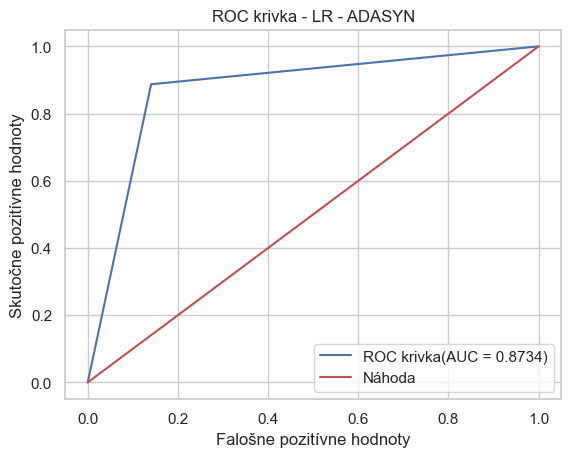

AUC: 0.8733714943387586


In [50]:
#Logistická Regresia s nad vzorkovanim ADASYN
#Vytvorenie modelu LR s následným trénovaním na trénovacích dátach a vytvorenie novej klasifikácie. Random state parameter zvoleny 0 pre lepšiu reprodukovateľnosť výsledkov.
LM1 = LogisticRegression(random_state=0)
model_LMB = LM1.fit(x_train_adasyn, y_train_adasyn)
LRresultb = model_LMB.predict(x_test_adasyn)

#Nájdenie dôležitých atribútov a ich následné vypísanie
importances_LRb = model_LMB.coef_[0]
feature_namesLRb = x_train_adasyn.columns
#Grafické zobrazenie dôležitých atribútov.
plt.figure(figsize=(10, 6))
plt.barh(feature_namesLRb, importances_LRb)
plt.xlabel("Dôležitosť")
plt.title("Dôležitosť atribútov - Logistická Regresia - ADASYN")
plt.show()

#Vytvorenie a vypísanie matice zámen a classification reportu.
ct_lr_adasyn = confusion_matrix(y_test_adasyn, LRresultb) 
print(ct_lr_adasyn)
print(classification_report(y_test_adasyn, LRresultb,digits=4))

#Výpočet ROC krivky a AUC metriky.
fprfb, tprfb, threshold = roc_curve(y_test_adasyn, LRresultb)
roc_aucfb = auc(fprfb, tprfb)
#Grafické zobrazenie ROC krivky a vypísanie AUC hodnoty
plt.figure()
plt.plot(fprfb, tprfb, color='b', label='ROC krivka(AUC = {:.4f})'.format(roc_aucfb))
plt.plot([0, 1], [0, 1], color='r',label='Náhoda')
plt.xlabel('Falošne pozitívne hodnoty')
plt.ylabel('Skutočne pozitívne hodnoty')
plt.title('ROC krivka - LR - ADASYN')
plt.legend(loc='lower right')
plt.show()
print('AUC:', roc_aucfb)

C:\Users\pc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


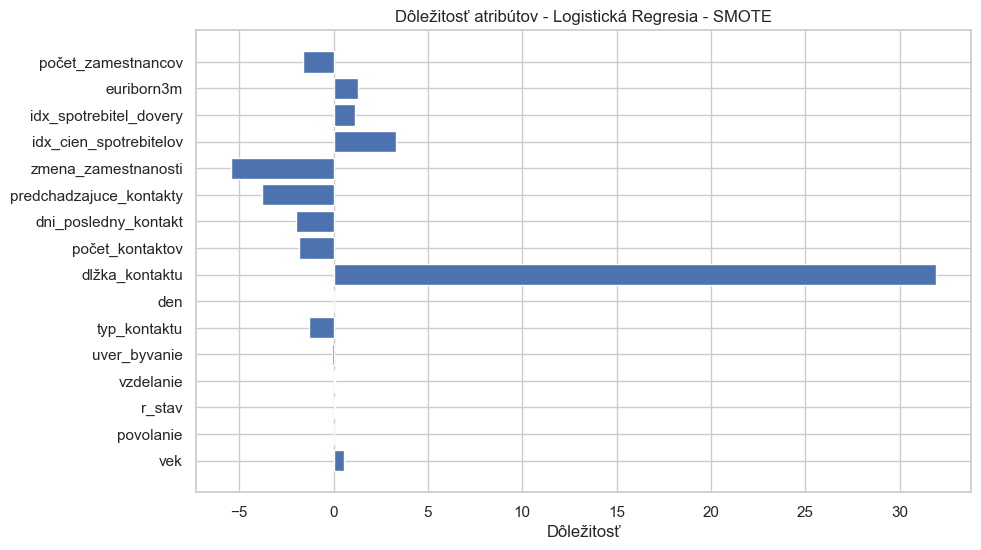

[[8811 1385]
 [1219 8978]]
              precision    recall  f1-score   support

           0     0.8785    0.8642    0.8713     10196
           1     0.8664    0.8805    0.8733     10197

    accuracy                         0.8723     20393
   macro avg     0.8724    0.8723    0.8723     20393
weighted avg     0.8724    0.8723    0.8723     20393



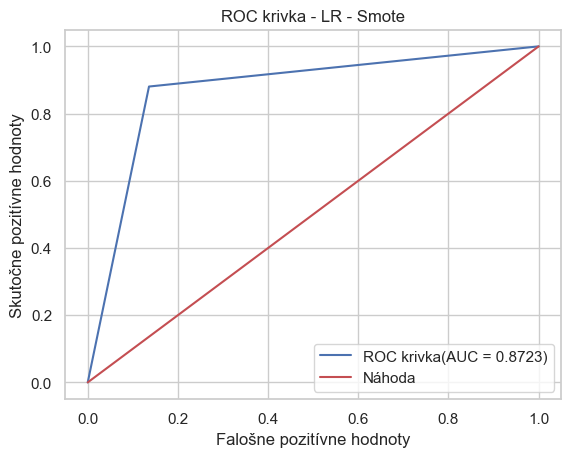

AUC: 0.8723087262144078


In [51]:
#Logistická Regresia s nad vzorkovanim SMOTE
#Vytvorenie modelu LR s následným trénovaním na trénovacích dátach a vytvorenie novej klasifikácie. Random state parameter zvoleny 0 pre lepšiu reprodukovateľnosť výsledkov.
LM1 = LogisticRegression(random_state=0)
model_LMC = LM1.fit(x_train_smote, y_train_smote)
LRresultc = model_LMC.predict(x_test_smote)

#Nájdenie dôležitých atribútov a ich následné vypísanie
importances_LRc = model_LMC.coef_[0]
feature_namesLRc = x_train_smote.columns
#Grafické zobrazenie dôležitých atribútov.
plt.figure(figsize=(10, 6))
plt.barh(feature_namesLRc, importances_LRc)
plt.xlabel("Dôležitosť")
plt.title("Dôležitosť atribútov - Logistická Regresia - SMOTE")
plt.show()

#Vytvorenie a vypísanie matice zámen a classification reportu.
ct_lr_smote = confusion_matrix(y_test_smote, LRresultc) 
print(ct_lr_smote)
print(classification_report(y_test_smote, LRresultc,digits=4))

#Výpočet ROC krivky a AUC metriky.
fprfc, tprfc, threshold = roc_curve(y_test_smote, LRresultc)
roc_aucfc = auc(fprfc, tprfc)

#Grafické zobrazenie ROC krivky a vypísanie AUC hodnoty
plt.figure()
plt.plot(fprfc, tprfc, color='b', label='ROC krivka(AUC = {:.4f})'.format(roc_aucfc))
plt.plot([0, 1], [0, 1], color='r',label='Náhoda')
plt.xlabel('Falošne pozitívne hodnoty')
plt.ylabel('Skutočne pozitívne hodnoty')
plt.title('ROC krivka - LR - Smote')
plt.legend(loc='lower right')
plt.show()
print('AUC:', roc_aucfc)

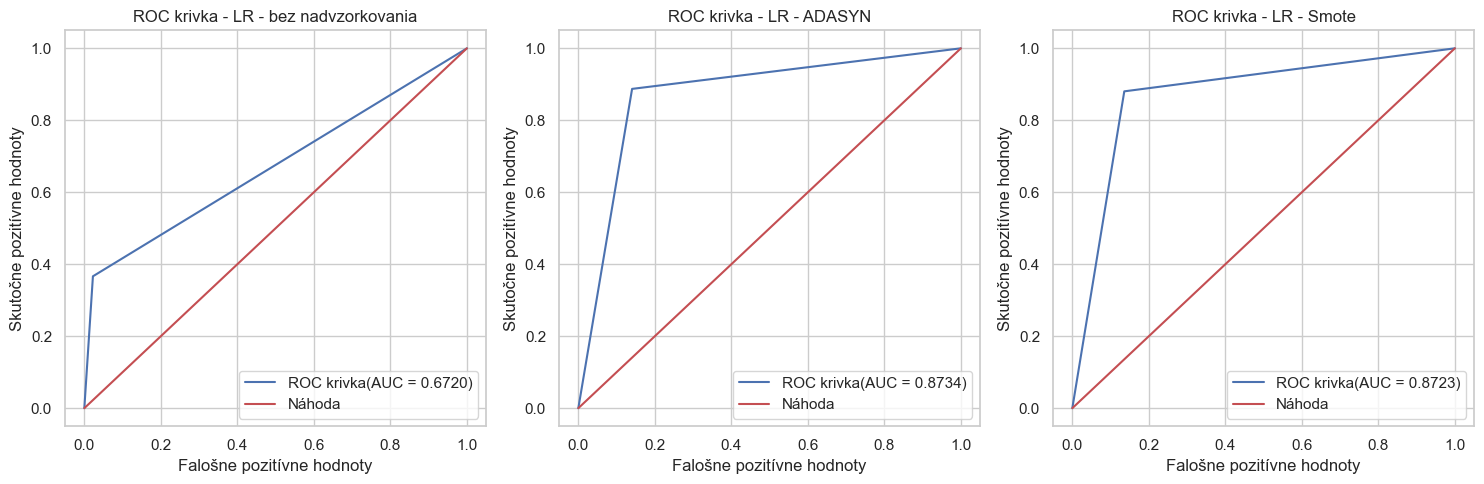

In [52]:
# Vytvorenie grafov ROC kriviek pre LR modely s jednotlivými typmi nad vzorkovania. Atriibuty: fprfa,fprfb,frpfc predstavuju falošne pozitívne hodnoty pre jednotlivé modely a trfa,trfb,trfc predstavuju skutočne pozitívne hodnoty pre jednotlivé modely.
plt.figure(figsize=(15, 5))

#Graf ROC krivky bez vzorkovania
plt.subplot(131)
plt.plot(fprfa, tprfa, color='b', label='ROC krivka(AUC = {:.4f})'.format(roc_aucfa))
plt.plot([0, 1], [0, 1], color='r',label='Náhoda')
plt.xlabel('Falošne pozitívne hodnoty')
plt.ylabel('Skutočne pozitívne hodnoty')
plt.title('ROC krivka - LR - bez nadvzorkovania')
plt.legend(loc='lower right')

#Graf ROC krivky s nad vzorkovaním ADASYN
plt.subplot(132)
plt.plot(fprfb, tprfb, color='b', label='ROC krivka(AUC = {:.4f})'.format(roc_aucfb))
plt.plot([0, 1], [0, 1], color='r',label='Náhoda')
plt.xlabel('Falošne pozitívne hodnoty')
plt.ylabel('Skutočne pozitívne hodnoty')
plt.title('ROC krivka - LR - ADASYN')
plt.legend(loc='lower right')

#Graf ROC krivky s nad vzorkovaním SMOTE
plt.subplot(133)
plt.plot(fprfc, tprfc, color='b', label='ROC krivka(AUC = {:.4f})'.format(roc_aucfc))
plt.plot([0, 1], [0, 1], color='r',label='Náhoda')
plt.xlabel('Falošne pozitívne hodnoty')
plt.ylabel('Skutočne pozitívne hodnoty')
plt.title('ROC krivka - LR - Smote')
plt.legend(loc='lower right')

plt.tight_layout()
plt.show()

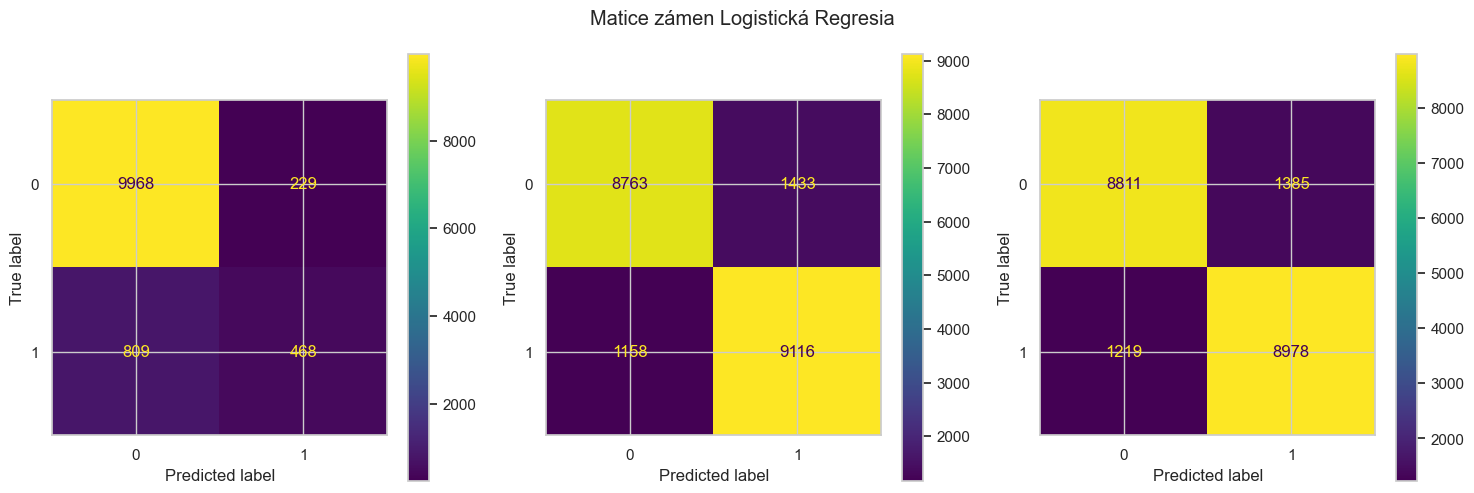

In [53]:
#Zobrazenie matic zámen pre jednotlivé modely Logistickej Regresie v grafickej podobe pomocou ConfusionMatrixDisplay.
fig,axes = plt.subplots(1,3,figsize=(15,5))

disp_1 = ConfusionMatrixDisplay(ct_lra)
disp_1.plot(ax=axes[0], cmap="viridis", values_format="d")

disp_2 = ConfusionMatrixDisplay(ct_lr_adasyn)
disp_2.plot(ax=axes[1], cmap="viridis")

disp_3 = ConfusionMatrixDisplay(ct_lr_smote)
disp_3.plot(ax=axes[2], cmap="viridis")

fig.suptitle("Matice zámen Logistická Regresia")
plt.tight_layout()
plt.show()

# Porovnanie s atributmi z chi-kvadrat testu

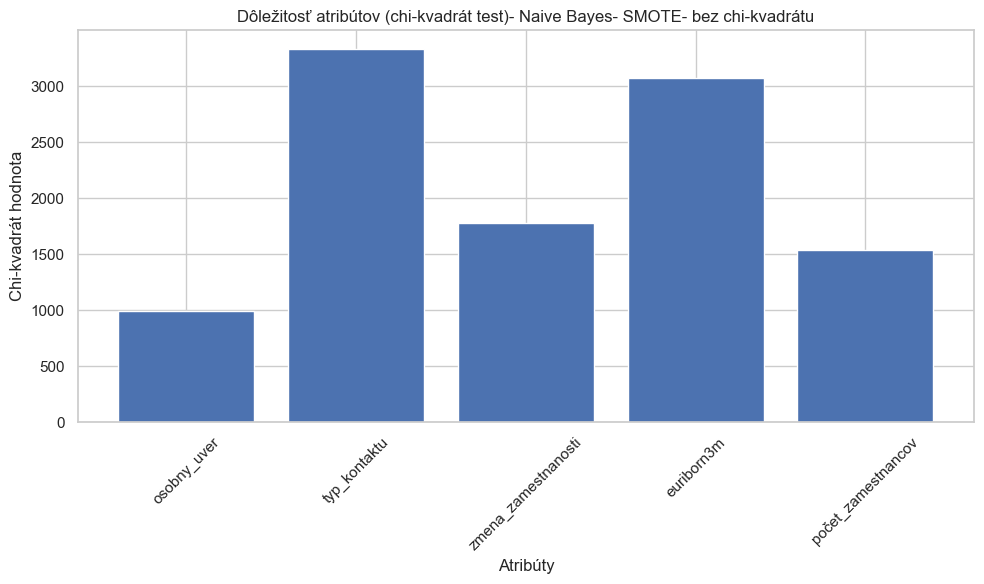

col_0     0     1
y                
0      7826  2370
1      2488  7709
              precision    recall  f1-score   support

           0     0.7588    0.7676    0.7631     10196
           1     0.7649    0.7560    0.7604     10197

    accuracy                         0.7618     20393
   macro avg     0.7618    0.7618    0.7618     20393
weighted avg     0.7618    0.7618    0.7618     20393



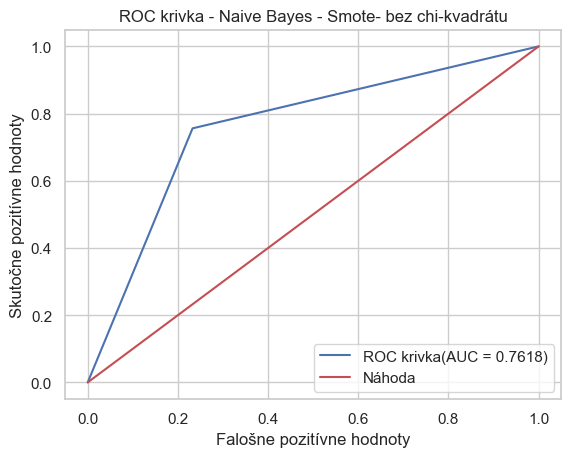

AUC0.7617812864521074


In [54]:
#Naive Bayes bez nad vzorkovania
#Vytvorenie modelu Nive Bayes a následne trenovanie a vytvorenie novej klasifikácie.
modelBCS = GaussianNB()
modelBCS.fit(x_train_smote2, y_train_smote2)
resultBS = modelBCS.predict(x_test_smote2)

#Výber najdôležitejších 5 atributov a ich zobrazenie zobrazenie.
selectorBS = SelectKBest(chi2, k=5)
selected_train_dataBS = selectorBS.fit_transform(x_train_smote2, y_train_smote2)
selected_indicesBS = selectorBS.get_support(indices=True)
selected_feature_namesBS = [x_train_smote2.columns[i] for i in selected_indicesBS]
#Zobrazenie grafu s dôležitých atribútov.
plt.figure(figsize=(10, 6))
plt.bar(selected_feature_namesBS, selectorBS.scores_[selected_indicesBS])
plt.xlabel("Atribúty")
plt.ylabel("Chi-kvadrát hodnota")
plt.title("Dôležitosť atribútov (chi-kvadrát test)- Naive Bayes- SMOTE- bez chi-kvadrátu")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()                

#Zobrazenie matice zámen a reportu klasifikácie.
ct_bayes_smoteS = pd.crosstab(y_test_smote2, resultBS)
print(ct_bayes_smoteS)                        
print(classification_report(y_test_smote2, resultBS,digits=4))

#Vytvorenie ROC krivky a vypočítanie AUC hodnoty s následným zobrazením ROC krivky a vypísaním AUC hodnoty.
fpracS, tpracS, _ = roc_curve(y_test_smote2, resultBS)
roc_aucacS = auc(fpracS, tpracS)

#Zobrazenie grafu ROC krivky a vypísanie samostatného atribútu AUC. V grafe je AUC zobrazene na 4 desatinné miesta.
plt.plot(fpracS, tpracS, color='b', label='ROC krivka(AUC = {:.4f})'.format(roc_aucacS))
plt.plot([0, 1], [0, 1], color='r',label='Náhoda')
plt.xlabel('Falošne pozitívne hodnoty')
plt.ylabel('Skutočne pozitívne hodnoty')
plt.title('ROC krivka - Naive Bayes - Smote- bez chi-kvadrátu')
plt.legend(loc='lower right')
plt.show()
print('AUC' + str(roc_aucacS))



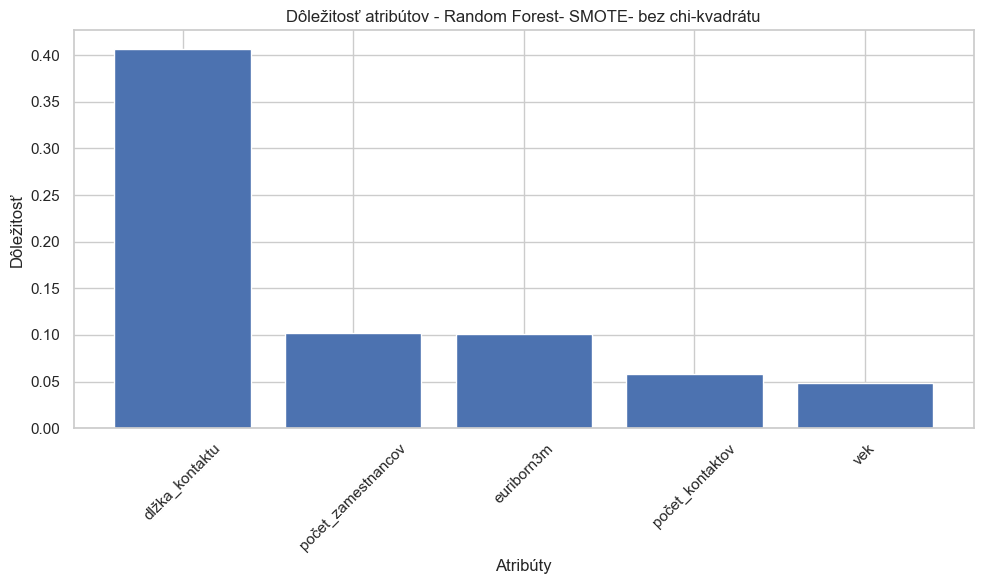

col_0     0     1
y                
0      9415   781
1       267  9930
              precision    recall  f1-score   support

           0     0.9724    0.9234    0.9473     10196
           1     0.9271    0.9738    0.9499     10197

    accuracy                         0.9486     20393
   macro avg     0.9498    0.9486    0.9486     20393
weighted avg     0.9498    0.9486    0.9486     20393



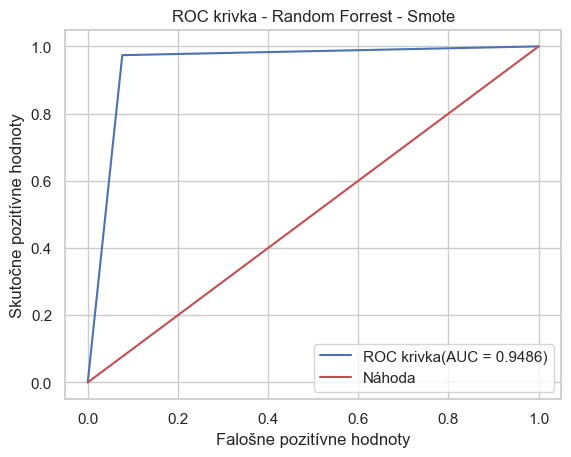

AUC: 0.9486085810205873


In [55]:
##Random Forrest s nad vzorkovaním SMOTE ale s atribútmi, ktoré boli odstránené na základe chi-kvadrát testu
#Vytvorenie modelu Random forest pomocou funkcie RandomForestClassifier, natrénovanie modelu a vytvorenie novej klasifikácie do premennej pred. Parameter random_state pre dosahovanie reprodukovateľných výsledkov.
model_rfCa = RandomForestClassifier(random_state=0)
model_rfCa.fit(x_train_smote2, y_train_smote2)
pred3a = model_rfCa.predict(x_test_smote2)

#Získanie 5 najdôležitejších atribútov pri trénovaní daného modelu a zobrezenie týchto atribútov na grafe.
importances_rfCa = model_rfCa.feature_importances_
sorted_indicesCa = importances_rfCa.argsort()[::-1]
top_feature_indicesCa = sorted_indicesCa[:5]
top_feature_namesCa = [x_train_smote2.columns[i] for i in top_feature_indicesCa]
#Zobrazenie najdôležitejších atribútov na grafe.
plt.figure(figsize=(10, 6))
plt.bar(top_feature_namesCa, importances_rfCa[top_feature_indicesCa])
plt.xlabel("Atribúty")
plt.ylabel("Dôležitosť")
plt.title("Dôležitosť atribútov - Random Forest- SMOTE- bez chi-kvadrátu")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#Vytvorenie a vypísanie matice zámen s classification reportu
ct_rf_smotea = pd.crosstab(y_test_smote2, pred3a)
print(ct_rf_smotea)
print(classification_report(y_test_smote2, pred3a,digits=4))

#Vytvorenie ROC krivky a vypočítanie AUC hodnoty s následným zobrazením ROC krivky a vypísaním AUC hodnoty.
fprccs, tprccs, threshold = roc_curve(y_test_smote2, pred3a)
roc_aucccs = auc(fprccs, tprccs)

#Zobrazenie grafu ROC krivky a vypísanie samostatného atribútu AUC. V grafe je AUC zobrazene na 4 desatinné miesta.
plt.figure()
plt.plot(fprccs, tprccs, color='b', label='ROC krivka(AUC = {:.4f})'.format(roc_aucccs))
plt.plot([0, 1], [0, 1], color='r',label='Náhoda')
plt.xlabel('Falošne pozitívne hodnoty')
plt.ylabel('Skutočne pozitívne hodnoty')
plt.title('ROC krivka - Random Forrest - Smote')
plt.legend(loc='lower right')
plt.show()
print('AUC:', roc_aucccs)

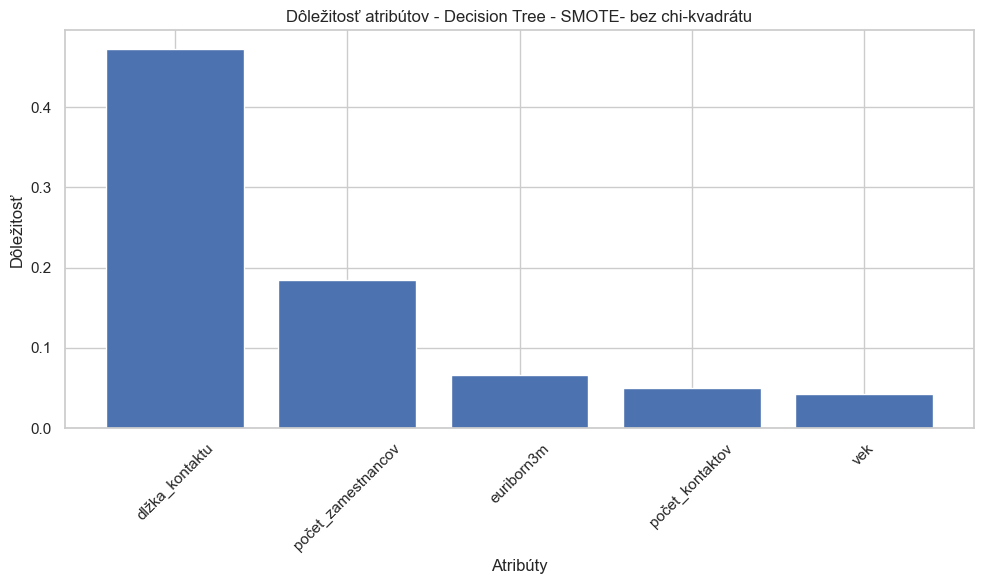

col_0     0     1
y                
0      9313   883
1       776  9421
              precision    recall  f1-score   support

           0     0.9231    0.9134    0.9182     10196
           1     0.9143    0.9239    0.9191     10197

    accuracy                         0.9186     20393
   macro avg     0.9187    0.9186    0.9186     20393
weighted avg     0.9187    0.9186    0.9186     20393



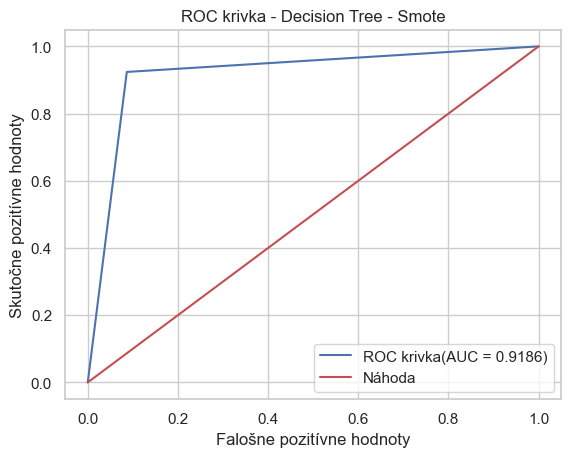

AUC: 0.9186482983922108


In [56]:
##Decision Tree s nad vzorkovaním SMOTE ale s atribútmi, ktoré boli odstránené na základe chi-kvadrát testu
#Vytvorenie modelu pomocou funkcie DecisionTreeClassifier s následovným trénovaním modelu a novou klasifikáciou cieľového atribútu. Opätovné využitie parametra random_state pre reprodukovateľnosť výsledkov.
model_DTCS = DecisionTreeClassifier(random_state=0)
model_DTCS = model_DTCS.fit(x_train_smote2, y_train_smote2)
result2a = model_DTCS.predict(x_test_smote2)

#Získanie 5 najdôležitejších atribútov pri trénovaní daného modelu a zobrezenie týchto atribútov na grafe.
importances_dtCCa = model_DTCS.feature_importances_
sorted_indicesCCa = importances_dtCCa.argsort()[::-1]
top_feature_indicesCCa = sorted_indicesCCa[:5]
top_feature_namesCC = [x_train_smote2.columns[i] for i in top_feature_indicesCCa]
#Zobrazenie najdôležitejších atribútov na grafe.
plt.figure(figsize=(10, 6))
plt.bar(top_feature_namesCC, importances_dtCC[top_feature_indicesCC])
plt.xlabel("Atribúty")
plt.ylabel("Dôležitosť")
plt.title("Dôležitosť atribútov - Decision Tree - SMOTE- bez chi-kvadrátu")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#Vytvorenie a vypísanie matice zámen s classification reportu
ct_dt_smotea = pd.crosstab(y_test_smote2, result2a)
print(ct_dt_smotea)
print(classification_report(y_test_smote2, result2a,digits=4))

#Vytvorenie ROC krivky a vypočítanie AUC hodnoty s následným zobrazením ROC krivky a vypísaním AUC hodnoty.
fprdcs, tprdcs, threshold = roc_curve(y_test_smote2, result2a)
roc_aucdcs = auc(fprdcs, tprdcs)

#Zobrazenie grafu ROC krivky a vypísanie samostatného atribútu AUC. V grafe je AUC zobrazene na 4 desatinné miesta.
plt.figure()
plt.plot(fprdcs, tprdcs, color='b', label='ROC krivka(AUC = {:.4f})'.format(roc_aucdcs))
plt.plot([0, 1], [0, 1], color='r',label='Náhoda')
plt.xlabel('Falošne pozitívne hodnoty')
plt.ylabel('Skutočne pozitívne hodnoty')
plt.title('ROC krivka - Decision Tree - Smote')
plt.legend(loc='lower right')
plt.show()
print('AUC:', roc_aucdcs)

C:\Users\pc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


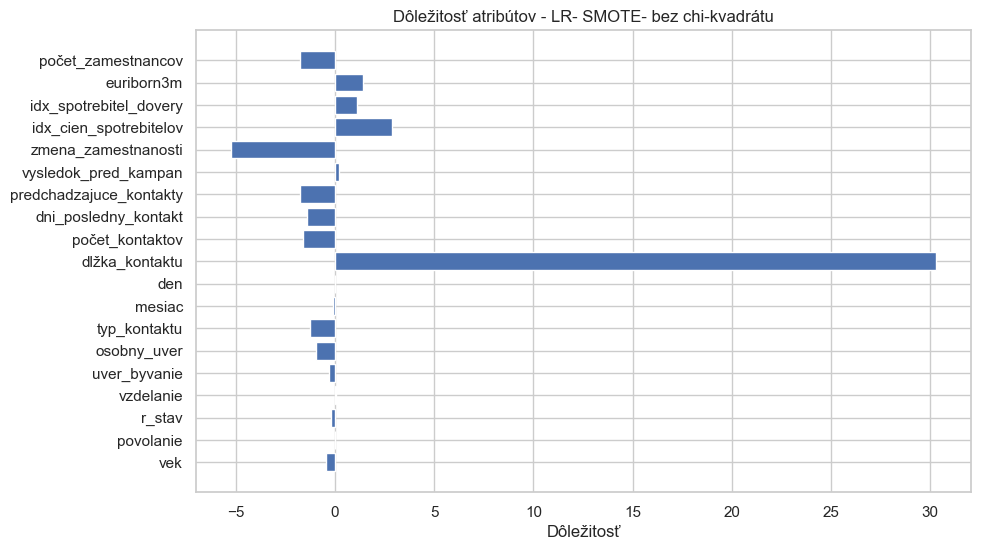

col_0     0     1
y                
0      8810  1386
1      1077  9120
              precision    recall  f1-score   support

           0     0.8911    0.8641    0.8774     10196
           1     0.8681    0.8944    0.8810     10197

    accuracy                         0.8792     20393
   macro avg     0.8796    0.8792    0.8792     20393
weighted avg     0.8796    0.8792    0.8792     20393



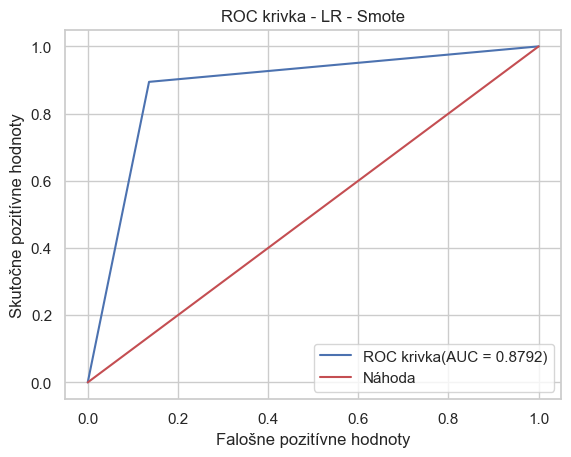

AUC: 0.8792225195811982


In [57]:
##Logistic Refression s nad vzorkovaním SMOTE ale s atribútmi, ktoré boli odstránené na základe chi-kvadrát testu
#Vytvorenie modelu pomocou funkcie LogisticRegression s následovným trénovaním modelu a novou klasifikáciou cieľového atribútu. Opätovné využitie parametra random_state pre reprodukovateľnosť výsledkov.
LM1a = LogisticRegression(random_state=0)
LM1a = LM1a.fit(x_train_smote2, y_train_smote2)
LRresultca = LM1a.predict(x_test_smote2)

#Získanie 5 najdôležitejších atribútov pri trénovaní daného modelu a zobrezenie týchto atribútov na grafe.
importances_LRca = LM1a.coef_[0]
feature_namesLRca = x_train_smote2.columns
#Zobrazenie najdôležitejších atribútov na grafe.
plt.figure(figsize=(10, 6))
plt.barh(feature_namesLRca, importances_LRca)
plt.xlabel("Dôležitosť")
plt.title("Dôležitosť atribútov - LR- SMOTE- bez chi-kvadrátu")
plt.show()

#Vytvorenie a vypísanie matice zámen s classification reportu
ct_lr_smoted = pd.crosstab(y_test_smote2, LRresultca) 
print(ct_lr_smoted)
print(classification_report(y_test_smote2, LRresultca,digits=4))

#Vytvorenie ROC krivky a vypočítanie AUC hodnoty s následným zobrazením ROC krivky a vypísaním AUC hodnoty.
fprfd, tprfd, threshold = roc_curve(y_test_smote2, LRresultca)
roc_aucfd = auc(fprfd, tprfd)

#Zobrazenie grafu ROC krivky a vypísanie samostatného atribútu AUC. V grafe je AUC zobrazene na 4 desatinné miesta.
plt.figure()
plt.plot(fprfd, tprfd, color='b', label='ROC krivka(AUC = {:.4f})'.format(roc_aucfd))
plt.plot([0, 1], [0, 1], color='r',label='Náhoda')
plt.xlabel('Falošne pozitívne hodnoty')
plt.ylabel('Skutočne pozitívne hodnoty')
plt.title('ROC krivka - LR - Smote')
plt.legend(loc='lower right')
plt.show()
print('AUC:', roc_aucfd)

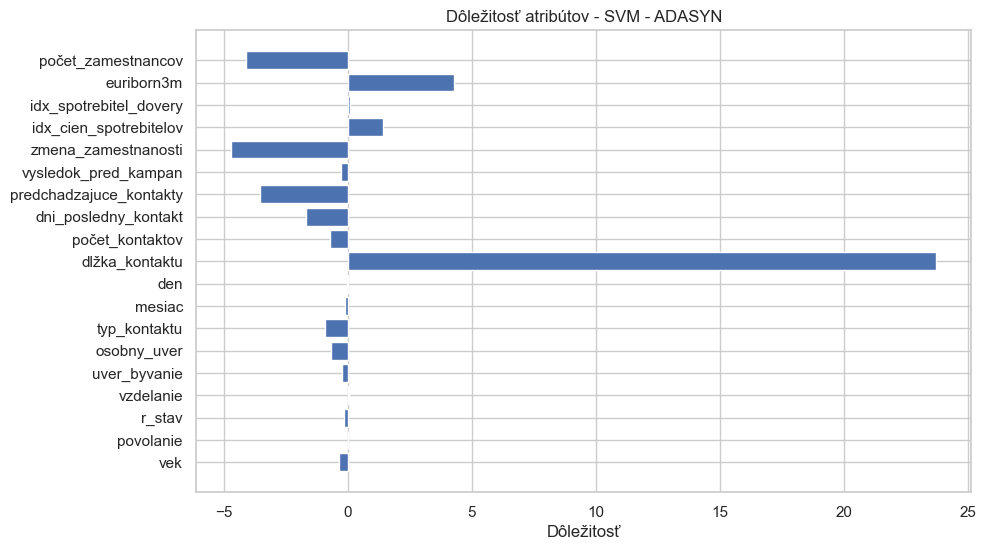

col_0     0     1
y                
0      8668  1528
1       826  9491
              precision    recall  f1-score   support

           0     0.9130    0.8501    0.8804     10196
           1     0.8613    0.9199    0.8897     10317

    accuracy                         0.8852     20513
   macro avg     0.8872    0.8850    0.8851     20513
weighted avg     0.8870    0.8852    0.8851     20513



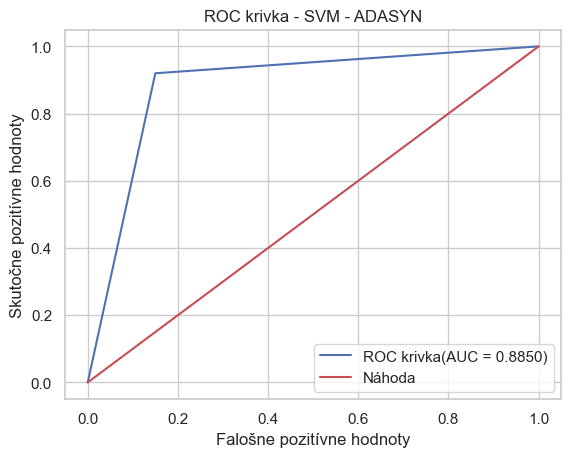

AUC: 0.885037637605824


In [58]:
##Support Vector Machine s nad vzorkovaním ADASYN ale s atribútmi, ktoré boli odstránené na základe chi-kvadrát testu
#Vytvorenie modelu SVM s následným trénovaním na trénovacích dátach a vytvorenie novej klasifikácie. Parameter karnel sme zvolili lineár. Random state parameter zvoleny 9 pre lepšiu reprodukovateľnosť výsledkov.
model_SVMD = SVC(kernel='linear',random_state=0)
model_SVMD = model_SVMD.fit(x_train_adasyn2, y_train_adasyn2)
result = model_SVMD.predict(x_test_adasyn2)

#Získanie 5 najdôležitejších atribútov pri trénovaní daného modelu a zobrezenie týchto atribútov na grafe.
importances_svmBD = model_SVMD.coef_[0]
feature_namesBD = x_train_adasyn2.columns
#Zobrazenie najdôležitejších atribútov na grafe.
plt.figure(figsize=(10, 6))
plt.barh(feature_namesBD, importances_svmBD)
plt.xlabel("Dôležitosť")
plt.title("Dôležitosť atribútov - SVM - ADASYN")
plt.show()

#Vytvorenie a vypísanie matice zámen s classification reportu
ct_svm_adasyn2 = pd.crosstab(y_test_adasyn2, result)
print(ct_svm_adasyn2)
print(classification_report(y_test_adasyn2, result,digits=4))

#Vytvorenie ROC krivky a vypočítanie AUC hodnoty s následným zobrazením ROC krivky a vypísaním AUC hodnoty.
fpred, tpred, threshold = roc_curve(y_test_adasyn2, result)
roc_auced = auc(fpred, tpred)

#Zobrazenie grafu ROC krivky a vypísanie samostatného atribútu AUC. V grafe je AUC zobrazene na 4 desatinné miesta.
plt.figure()
plt.plot(fpred, tpred, color='b', label='ROC krivka(AUC = {:.4f})'.format(roc_auced))
plt.plot([0, 1], [0, 1], color='r',label='Náhoda')
plt.xlabel('Falošne pozitívne hodnoty')
plt.ylabel('Skutočne pozitívne hodnoty')
plt.title('ROC krivka - SVM - ADASYN')
plt.legend(loc='lower right')
plt.show()
print('AUC:', roc_auced)

col_0     0     1
y                
0      8160  2036
1      1444  8753
              precision    recall  f1-score   support

           0     0.8496    0.8003    0.8242     10196
           1     0.8113    0.8584    0.8342     10197

    accuracy                         0.8294     20393
   macro avg     0.8305    0.8294    0.8292     20393
weighted avg     0.8305    0.8294    0.8292     20393



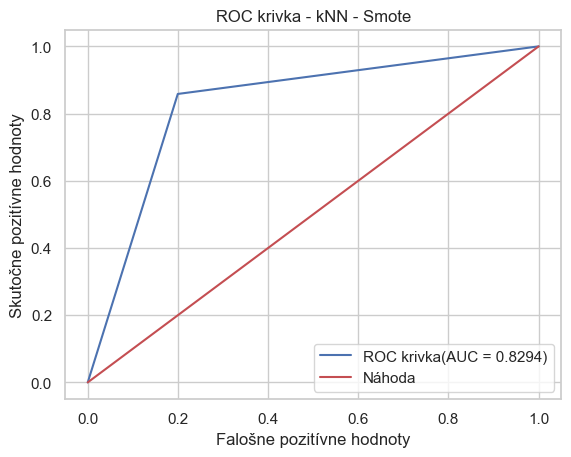

AUC: 0.829351785517729


In [59]:
##kNN s nad vzorkovaním SMOTE ale s atribútmi, ktoré boli odstránené na základe chi-kvadrát testu                                        
#Vytvorenie modelu knn pomocou kNeighborsClassifier funkcie, následné trénovanie modelu a vytvorenie nových klasifikácií.
model1d = KNeighborsClassifier(n_neighbors = 31)
fitad = model1d.fit(x_train_smote2, y_train_smote2)
res3d = model1d.predict(x_test_smote2)

#Vytvorenie a vypísanie matice zámen s classification reportu
ct_knn_smoted = pd.crosstab(y_test_smote2, res3d)
print(ct_knn_smoted)  
print(classification_report(y_test_smote2, res3d,digits=4))

#Vytvorenie ROC krivky a vypočítanie AUC hodnoty s následným zobrazením ROC krivky a vypísaním AUC hodnoty.
fprbd, tprbd, threshold = roc_curve(y_test_smote2, res3d)
roc_aucbd = auc(fprbd, tprbd)

#Zobrazenie grafu ROC krivky a vypísanie samostatného atribútu AUC. V grafe je AUC zobrazene na 4 desatinné miesta.
plt.figure()
plt.plot(fprbd, tprbd, color='b', label='ROC krivka(AUC = {:.4f})'.format(roc_aucbd))
plt.plot([0, 1], [0, 1], color='r',label='Náhoda')
plt.xlabel('Falošne pozitívne hodnoty')
plt.ylabel('Skutočne pozitívne hodnoty')
plt.title('ROC krivka - kNN - Smote')
plt.legend(loc='lower right')
plt.show()
print('AUC:', roc_aucbd)